In [5]:
import sys
import numpy
import pandas
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from n2lite import n2lite
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['font.size'] = 24

In [8]:
d = n2lite.N2lite('/home/amigos/data/sql/sisiv/20181110_080806/param.db')
D = d.read_pandas_all()

In [9]:
beam_list = [
    '2l', '2r', '3l', '3r',
    '4l', '4r', '5l', '5r', 
    '1lu', '1ll', '1ru', '1rl'
]

In [10]:
_voltage = [D['sis_vol_{}'.format(beam)] for beam in beam_list]
_current = [D['sis_cur_{}'.format(beam)] for beam in beam_list]

In [75]:
# set tuning param

first_voltage = numpy.array([min(_vol) for _vol in _voltage])
last_voltage = numpy.array([max(_vol) for _vol in _voltage])
step = 0.01
roop = numpy.array([int((_last_vol - _first_vol) / step) + 1for _first_vol, _last_vol in zip(first_voltage, last_voltage)])
bins = numpy.array([numpy.arange(_first_vol, _last_vol + step, step) for _first_vol, _last_vol in zip(first_voltage, last_voltage)])
def set_flag(x, i):
    mask = step / 2
    for j in range(len(bins[i])):
        if x >= bins[i][j] - mask and x < bins[i][j] + mask: return j
        continue

In [76]:
df = pandas.DataFrame()
for i, beam in enumerate(beam_list):
    df['vol_{}'.format(beam)] = _voltage[i]
    df['cur_{}'.format(beam)] = _current[i]
    df['flag_{}'.format(beam)] = _voltage[i].apply(set_flag, args=(i,))

In [77]:
_idx = [
    [
        df['flag_{}'.format(beam)] [df['flag_{}'.format(beam)] == j].index
        for j in range(len(bins[i]))
        ]
    for i, beam in enumerate(beam_list)
]

idx = [
    [
        __idx for __idx in _idx[i] if __idx != []
    ]
    for i in range(len(beam_list))
]

voltage_all = [
    [
        [
            df['vol_{}'.format(beam)][__idx] 
            for __idx in _idx
        ] 
        for _idx in idx[i]
    ] 
    for i, beam in enumerate(beam_list)
]

current_all = [
    [
        [df['cur_{}'.format(beam)][__idx] 
         for __idx in _idx
        ] 
        for _idx in idx[i]
    ] 
    for i, beam in enumerate(beam_list)
]

voltage = [
    numpy.array([
        numpy.mean(_voltage_all) for _voltage_all in voltage_all[i]
    ]) 
    for i in range(len(beam_list))
]

current = [
    numpy.array([
        numpy.mean(_current_all) for _current_all in current_all[i]
    ])
    for i in range(len(beam_list))
]

/home/amigos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()


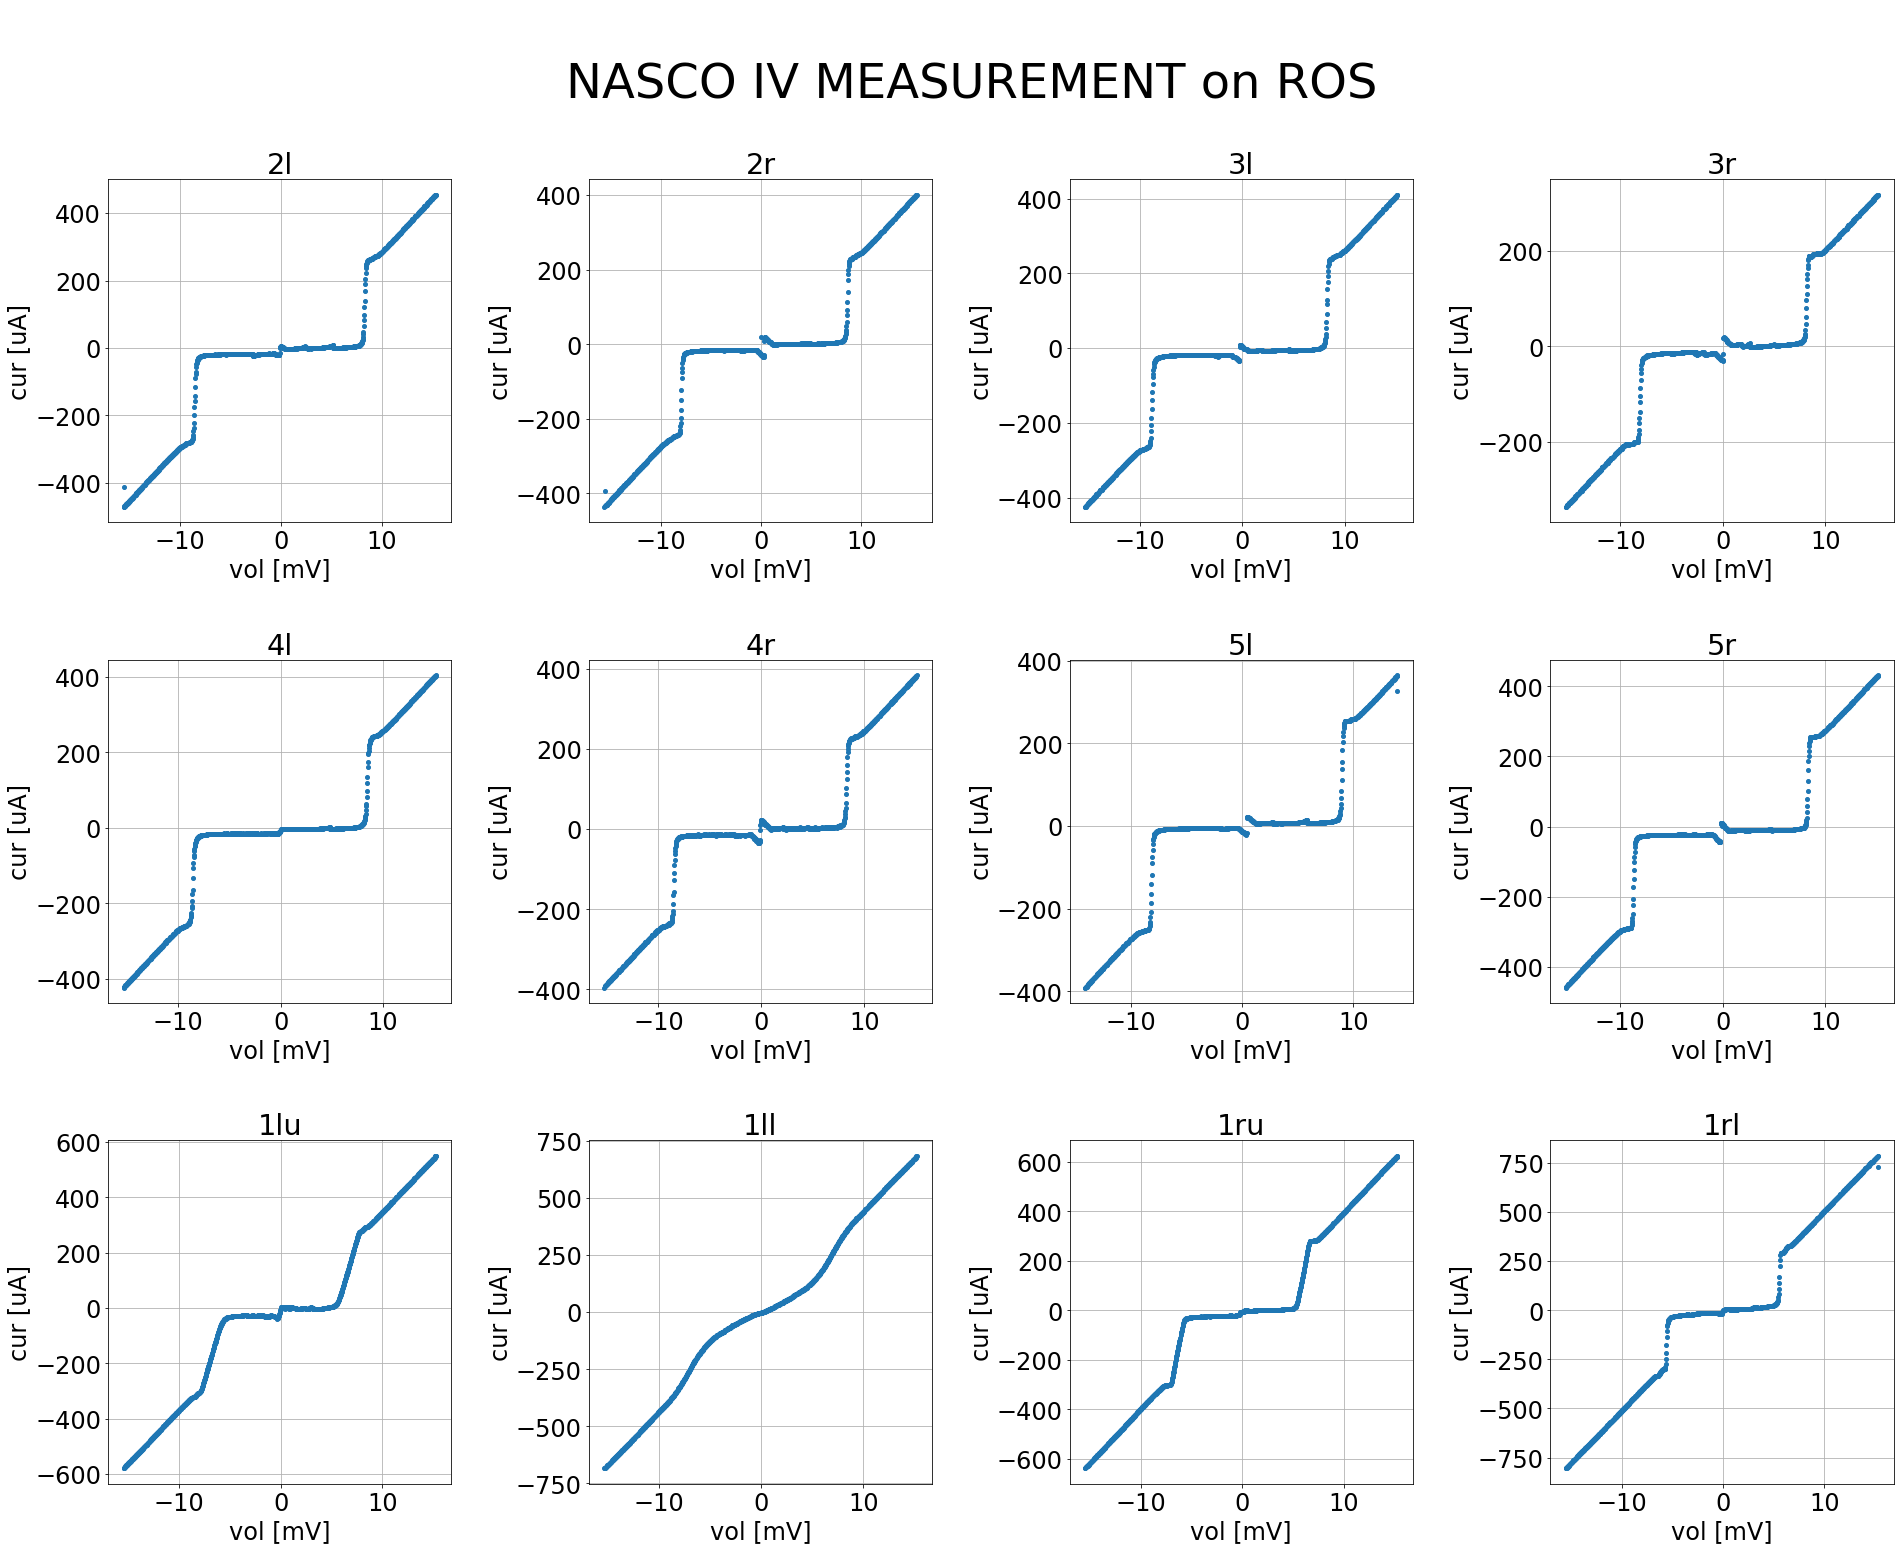

In [78]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam in zip(ax, voltage, current, beam_list):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
    _ax.set_xlabel('vol [mV]')
    _ax.set_ylabel('cur [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('\nNASCO IV MEASUREMENT on ROS', size=48)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()

In [227]:
# set_param

Rn_minus_first_current_100 = -360.
Rn_minus_last_current_100 = -300.
vgap_minus_first_current_100 = -180.
vgap_minus_last_current_100 = -80.
Rn_plus_first_current_100 = 300.
Rn_plus_last_current_100 = 360.
vgap_plus_first_current_100 = 80.
vgap_plus_last_current_100 = 180.

In [228]:
Rn_minus_first_current_200 = -500.
Rn_minus_last_current_200 = -400.
vgap_minus_first_current_200 = -200.
vgap_minus_last_current_200 = -80
Rn_plus_first_current_200 = 400.
Rn_plus_last_current_200 = 500.
vgap_plus_first_current_200 = 80.
vgap_plus_last_current_200 = 200.

In [229]:
idx_Rn_minus_first_current_100 = [
    numpy.argmin(abs(current[i] - Rn_minus_first_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_Rn_minus_last_current_100 = [
    numpy.argmin(abs(current[i] - Rn_minus_last_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_vgap_minus_first_current_100 = [
    numpy.argmin(abs(current[i] - vgap_minus_first_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_vgap_minus_last_current_100 = [
    numpy.argmin(abs(current[i] - vgap_minus_last_current_100))
    for i, beam in enumerate(beam_list[:8])
]    
idx_Rn_plus_first_current_100 = [
    numpy.argmin(abs(current[i] - Rn_plus_first_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_Rn_plus_last_current_100 = [
    numpy.argmin(abs(current[i] - Rn_plus_last_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_vgap_plus_first_current_100 = [
    numpy.argmin(abs(current[i] - vgap_plus_first_current_100))
    for i, beam in enumerate(beam_list[:8])
]
idx_vgap_plus_last_current_100 = [
    numpy.argmin(abs(current[i] - vgap_plus_last_current_100))
    for i, beam in enumerate(beam_list[:8])
]

In [230]:
idx_Rn_minus_first_current_200 = [
    numpy.argmin(abs(current[i] - Rn_minus_first_current_200))
    for i in range(8, 12)
]
idx_Rn_minus_last_current_200 = [
    numpy.argmin(abs(current[i] - Rn_minus_last_current_200))
    for i in range(8, 12)
]
idx_vgap_minus_first_current_200 = [
    numpy.argmin(abs(current[i] - vgap_minus_first_current_200))
    for i in range(8, 12)
]
idx_vgap_minus_last_current_200 = [
    numpy.argmin(abs(current[i] - vgap_minus_last_current_200))
    for i in range(8, 12)
]    
idx_Rn_plus_first_current_200 = [
    numpy.argmin(abs(current[i] - Rn_plus_first_current_200))
    for i in range(8, 12)
]
idx_Rn_plus_last_current_200 = [
    numpy.argmin(abs(current[i] - Rn_plus_last_current_200))
    for i in range(8, 12)
]
idx_vgap_plus_first_current_200 = [
    numpy.argmin(abs(current[i] - vgap_plus_first_current_200))
    for i in range(8, 12)
]
idx_vgap_plus_last_current_200 = [
    numpy.argmin(abs(current[i] - vgap_plus_last_current_200))
    for i in range(8, 12)
]

In [231]:
idx_Rn_minus_first_current = idx_Rn_minus_first_current_100 + idx_Rn_minus_first_current_200
idx_Rn_minus_last_current = idx_Rn_minus_last_current_100 + idx_Rn_minus_last_current_200
idx_vgap_minus_first_current = idx_vgap_minus_first_current_100 + idx_vgap_minus_first_current_200
idx_vgap_minus_last_current = idx_vgap_minus_last_current_100 + idx_vgap_minus_last_current_200
idx_Rn_plus_first_current = idx_Rn_plus_first_current_100 + idx_Rn_plus_first_current_200
idx_Rn_plus_last_current = idx_Rn_plus_last_current_100 + idx_Rn_plus_last_current_200
idx_vgap_plus_first_current = idx_vgap_plus_first_current_100 + idx_vgap_plus_first_current_200
idx_vgap_plus_last_current = idx_vgap_plus_last_current_100 + idx_vgap_plus_last_current_200

In [232]:
Rn_minus_voltage = [
    voltage[i][idx_Rn_minus_first_current[i]:idx_Rn_minus_last_current[i] + 1]
    for i in range(len(beam_list))
]
vgap_minus_voltage = [
    voltage[i][idx_vgap_minus_first_current[i]:idx_vgap_minus_last_current[i] + 1]
    for i in range(len(beam_list))
]
Rn_plus_voltage = [
    voltage[i][idx_Rn_plus_first_current[i]:idx_Rn_plus_last_current[i] + 1]
    for i in range(len(beam_list))
]
vgap_plus_voltage = [
    voltage[i][idx_vgap_plus_first_current[i]:idx_vgap_plus_last_current[i] + 1]
    for i in range(len(beam_list))
]

In [233]:
Rn_minus_current = [
    current[i][idx_Rn_minus_first_current[i]:idx_Rn_minus_last_current[i] + 1]
    for i in range(len(beam_list))
]
vgap_minus_current = [
    current[i][idx_vgap_minus_first_current[i]:idx_vgap_minus_last_current[i] + 1]
    for i in range(len(beam_list))
]
Rn_plus_current = [
    current[i][idx_Rn_plus_first_current[i]:idx_Rn_plus_last_current[i] + 1]
    for i in range(len(beam_list))
]
vgap_plus_current = [
    current[i][idx_vgap_plus_first_current[i]:idx_vgap_plus_last_current[i] + 1]
    for i in range(len(beam_list))
]

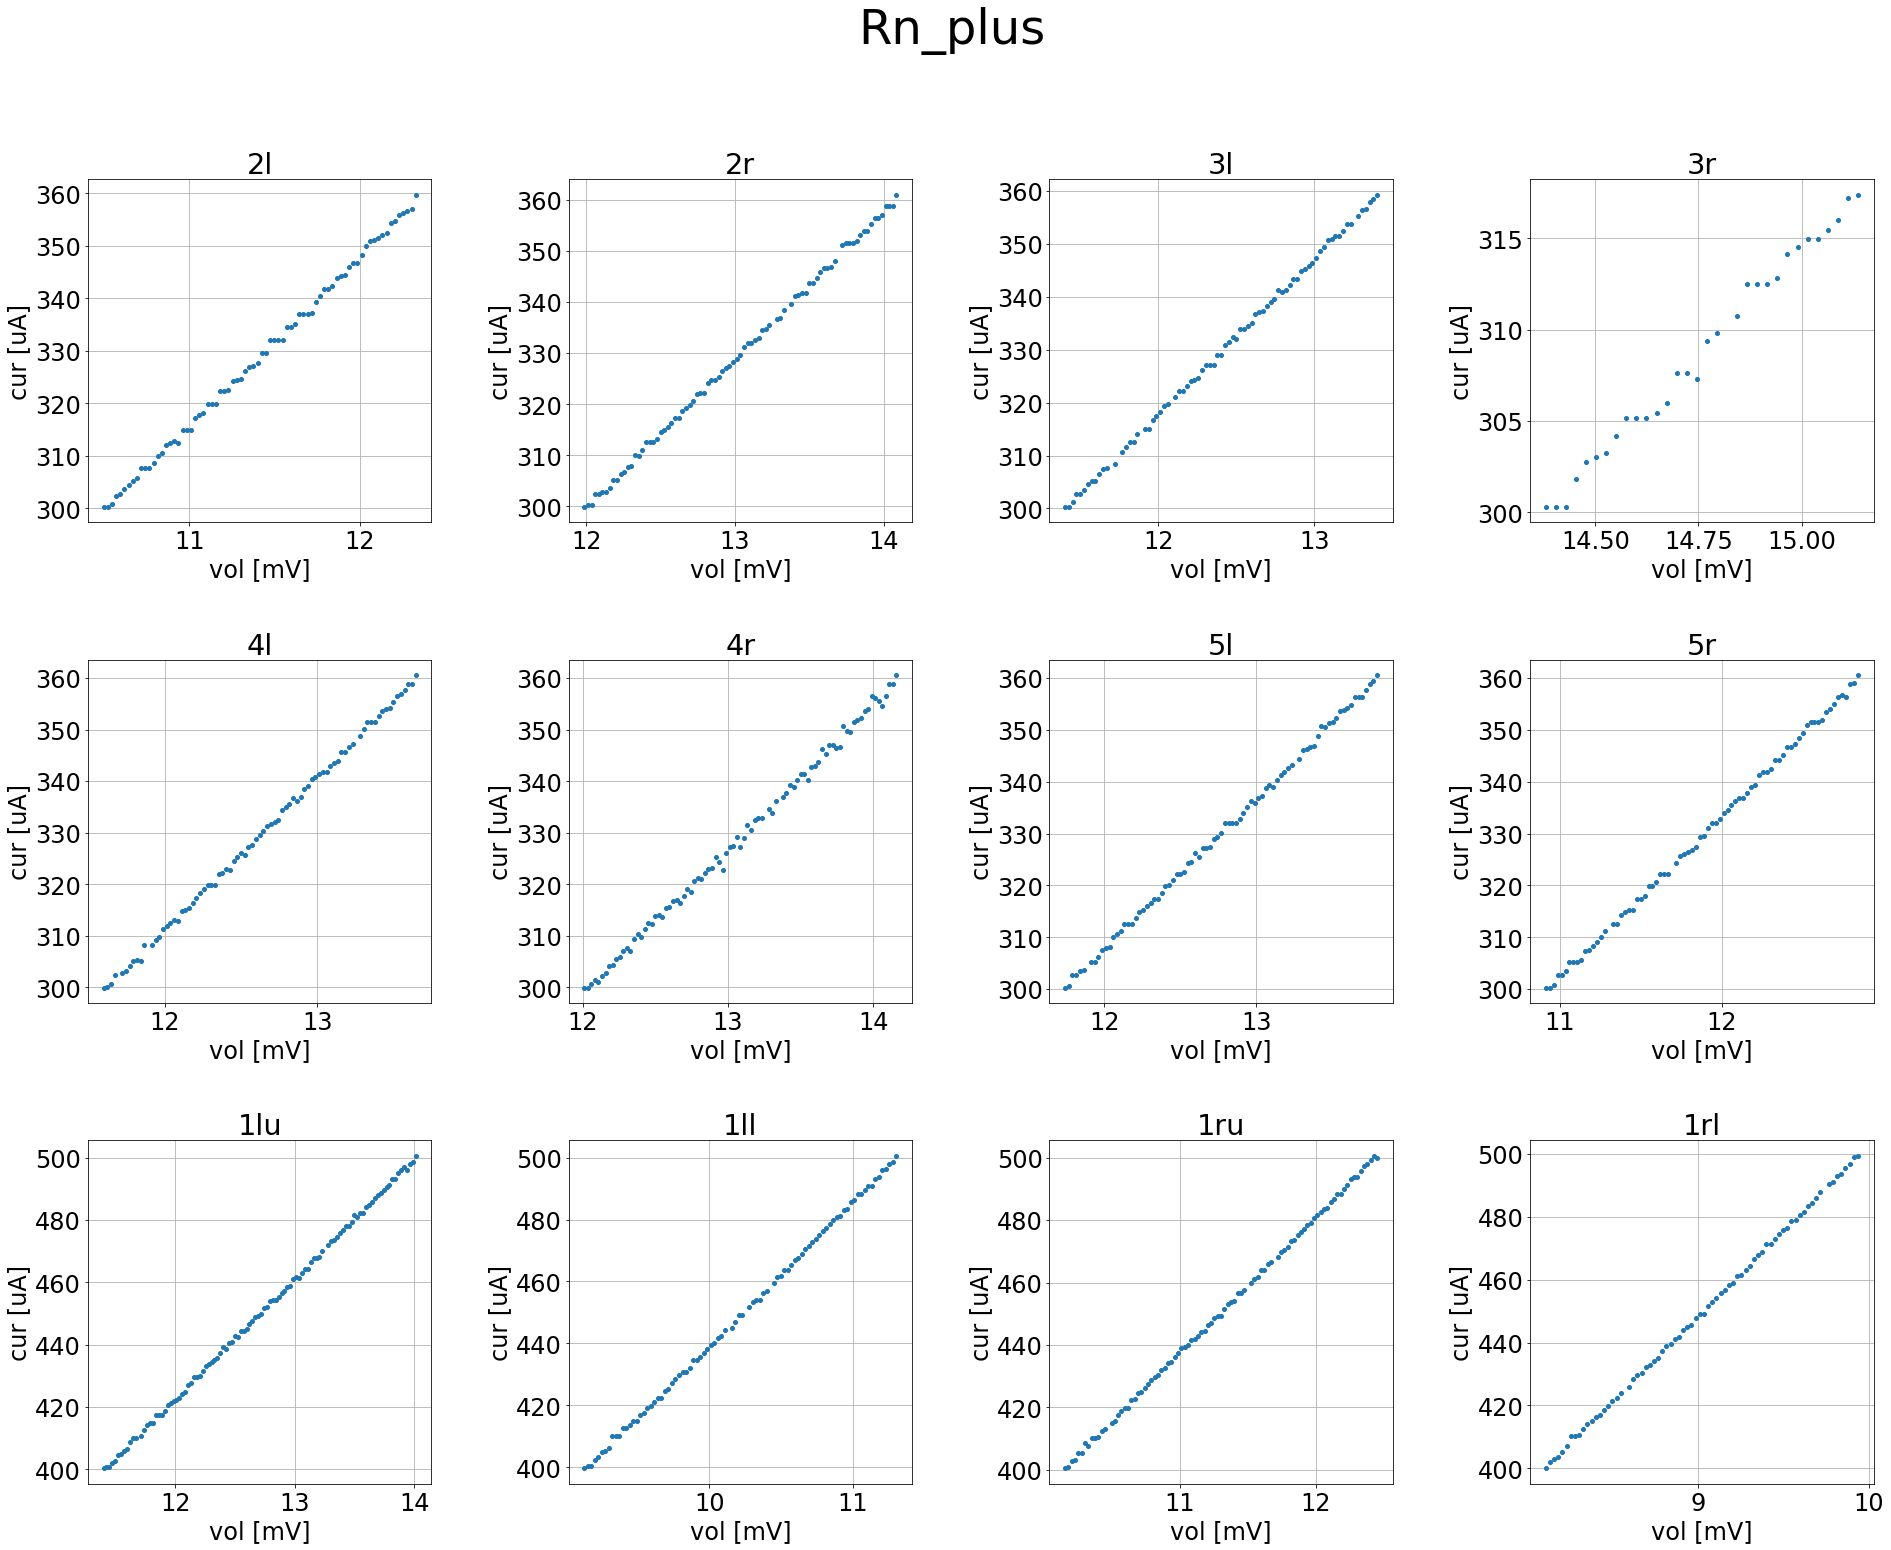

In [234]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam in zip(ax, Rn_plus_voltage, Rn_plus_current, beam_list):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
    _ax.set_xlabel('vol [mV]')
    _ax.set_ylabel('cur [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('Rn_plus', size=48)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()

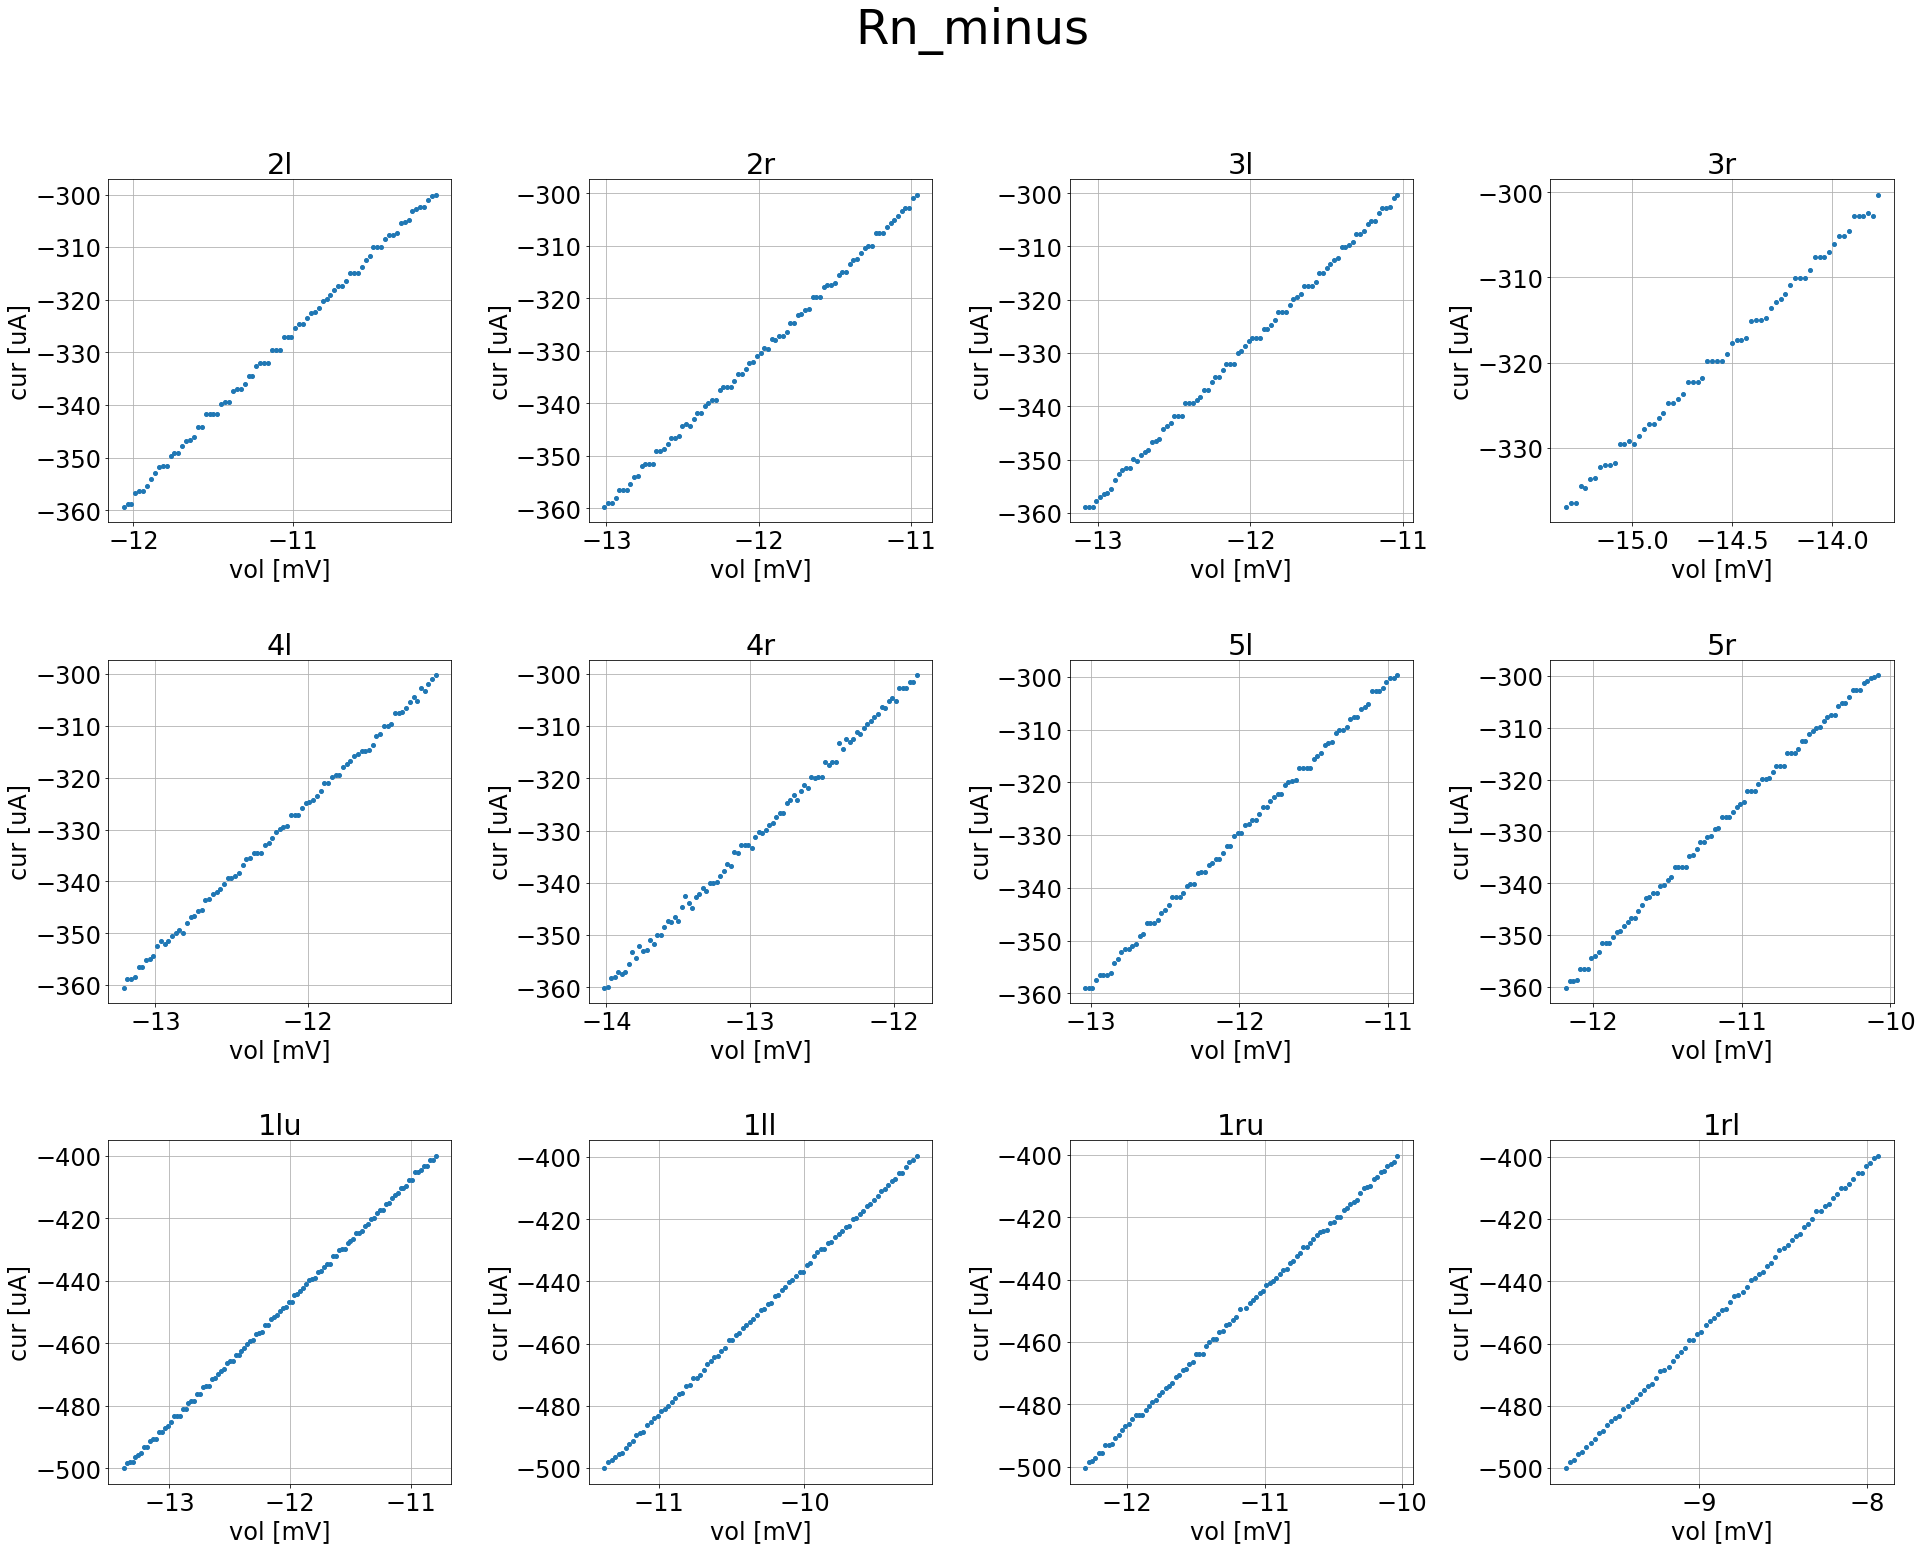

In [235]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam in zip(ax, Rn_minus_voltage, Rn_minus_current, beam_list):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
    _ax.set_xlabel('vol [mV]')
    _ax.set_ylabel('cur [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('Rn_minus', size=48)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()

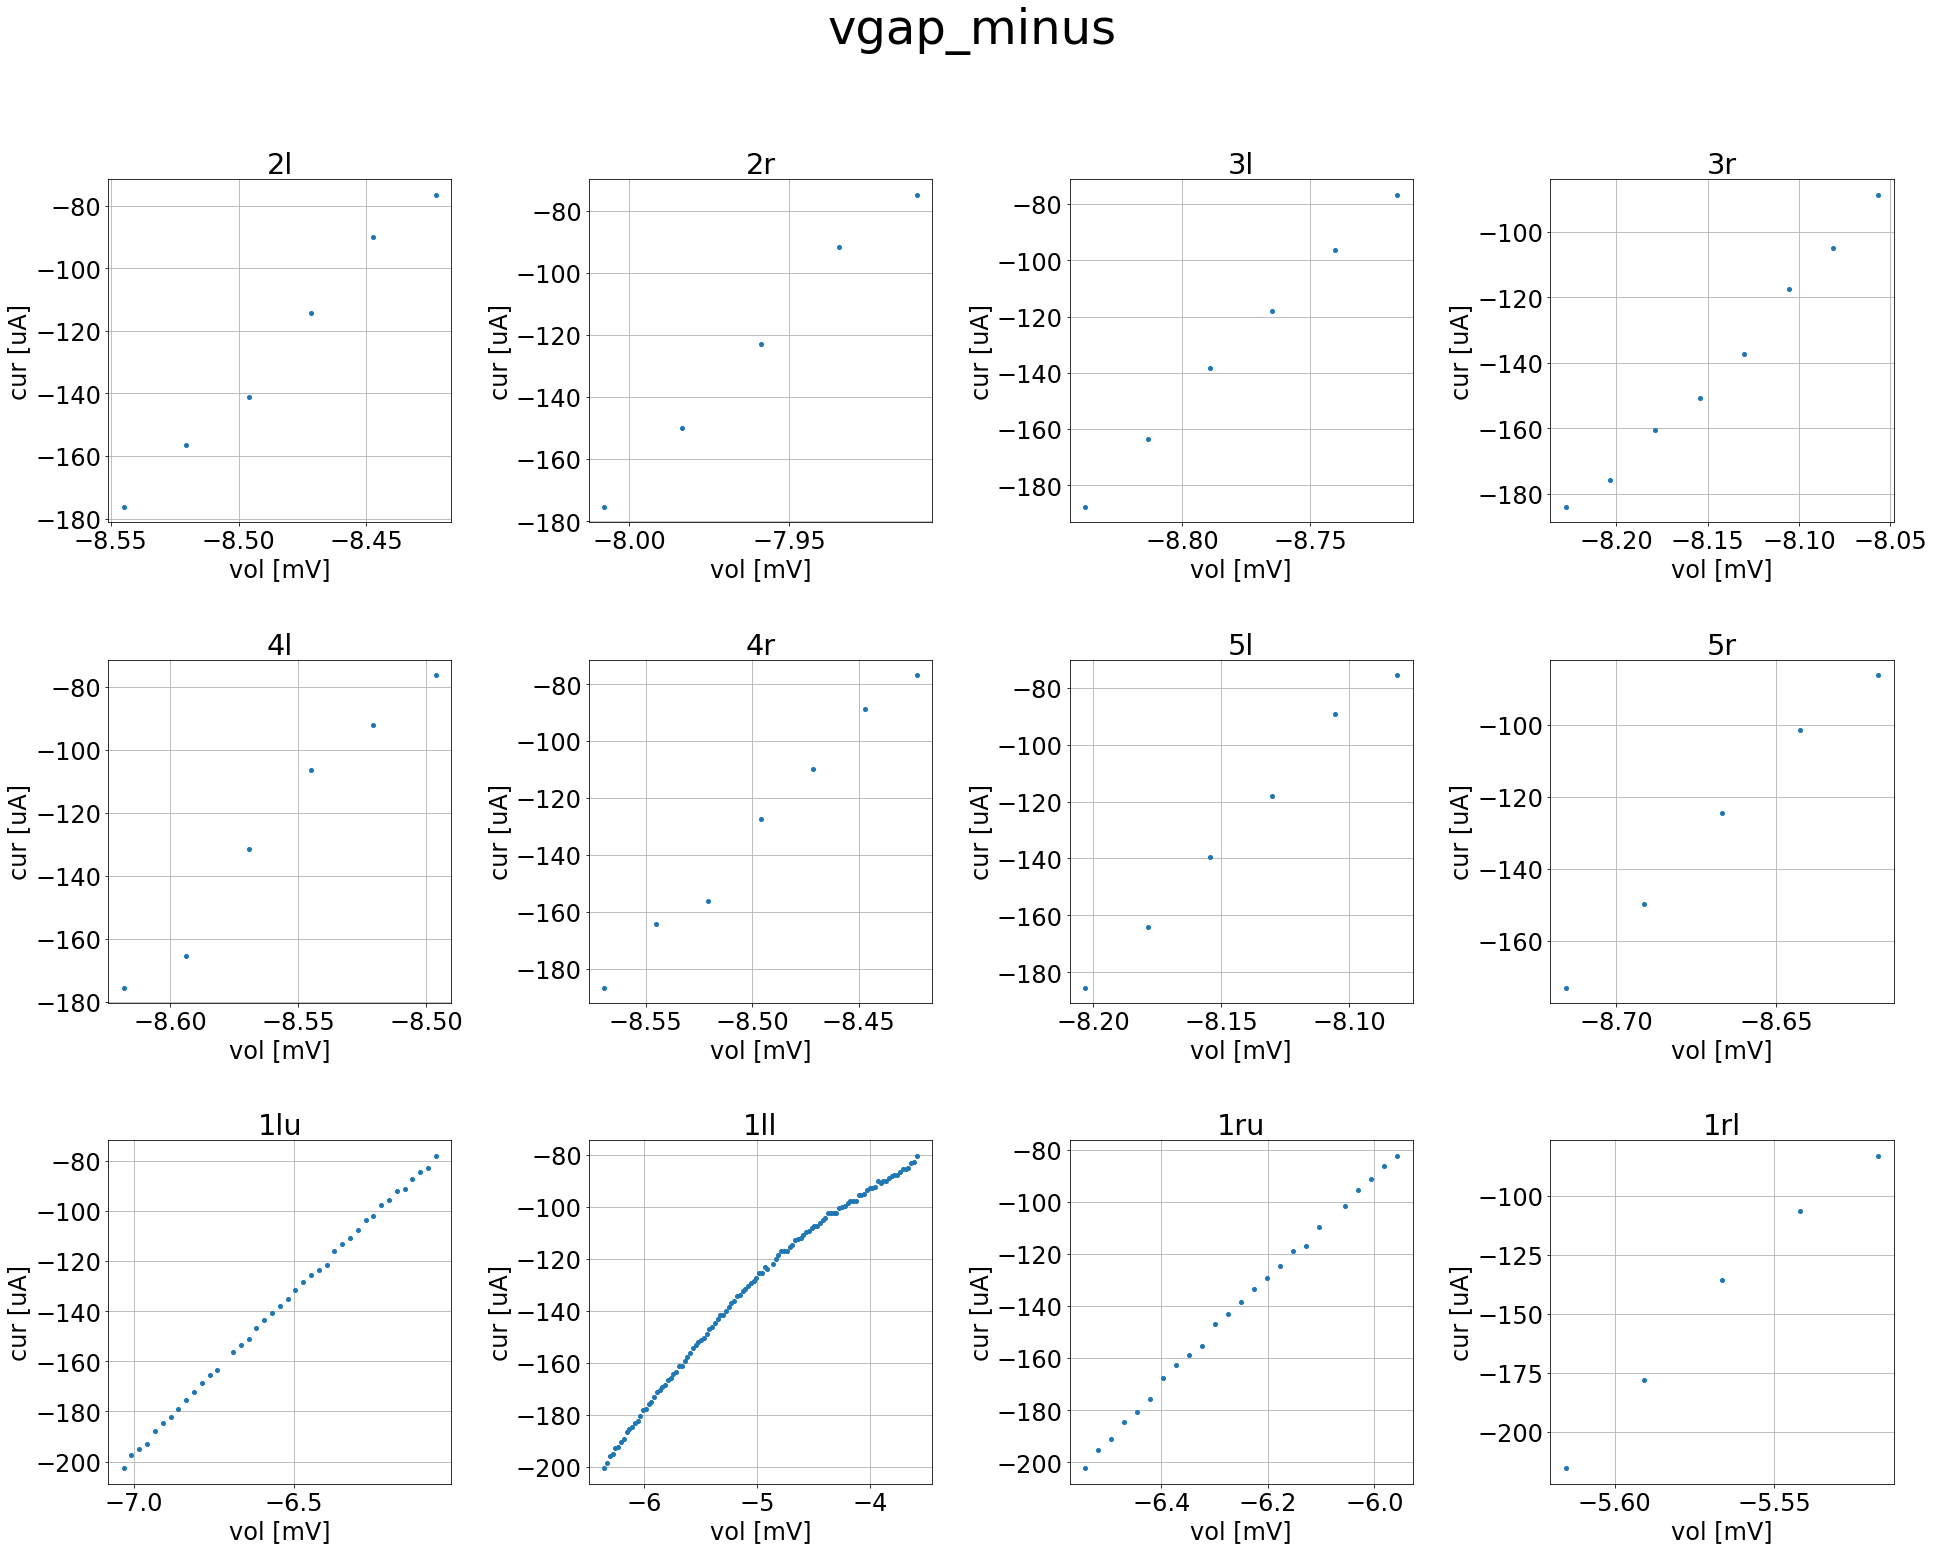

In [236]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam in zip(ax, vgap_minus_voltage, vgap_minus_current, beam_list):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
    _ax.set_xlabel('vol [mV]')
    _ax.set_ylabel('cur [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('vgap_minus', size=48)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()

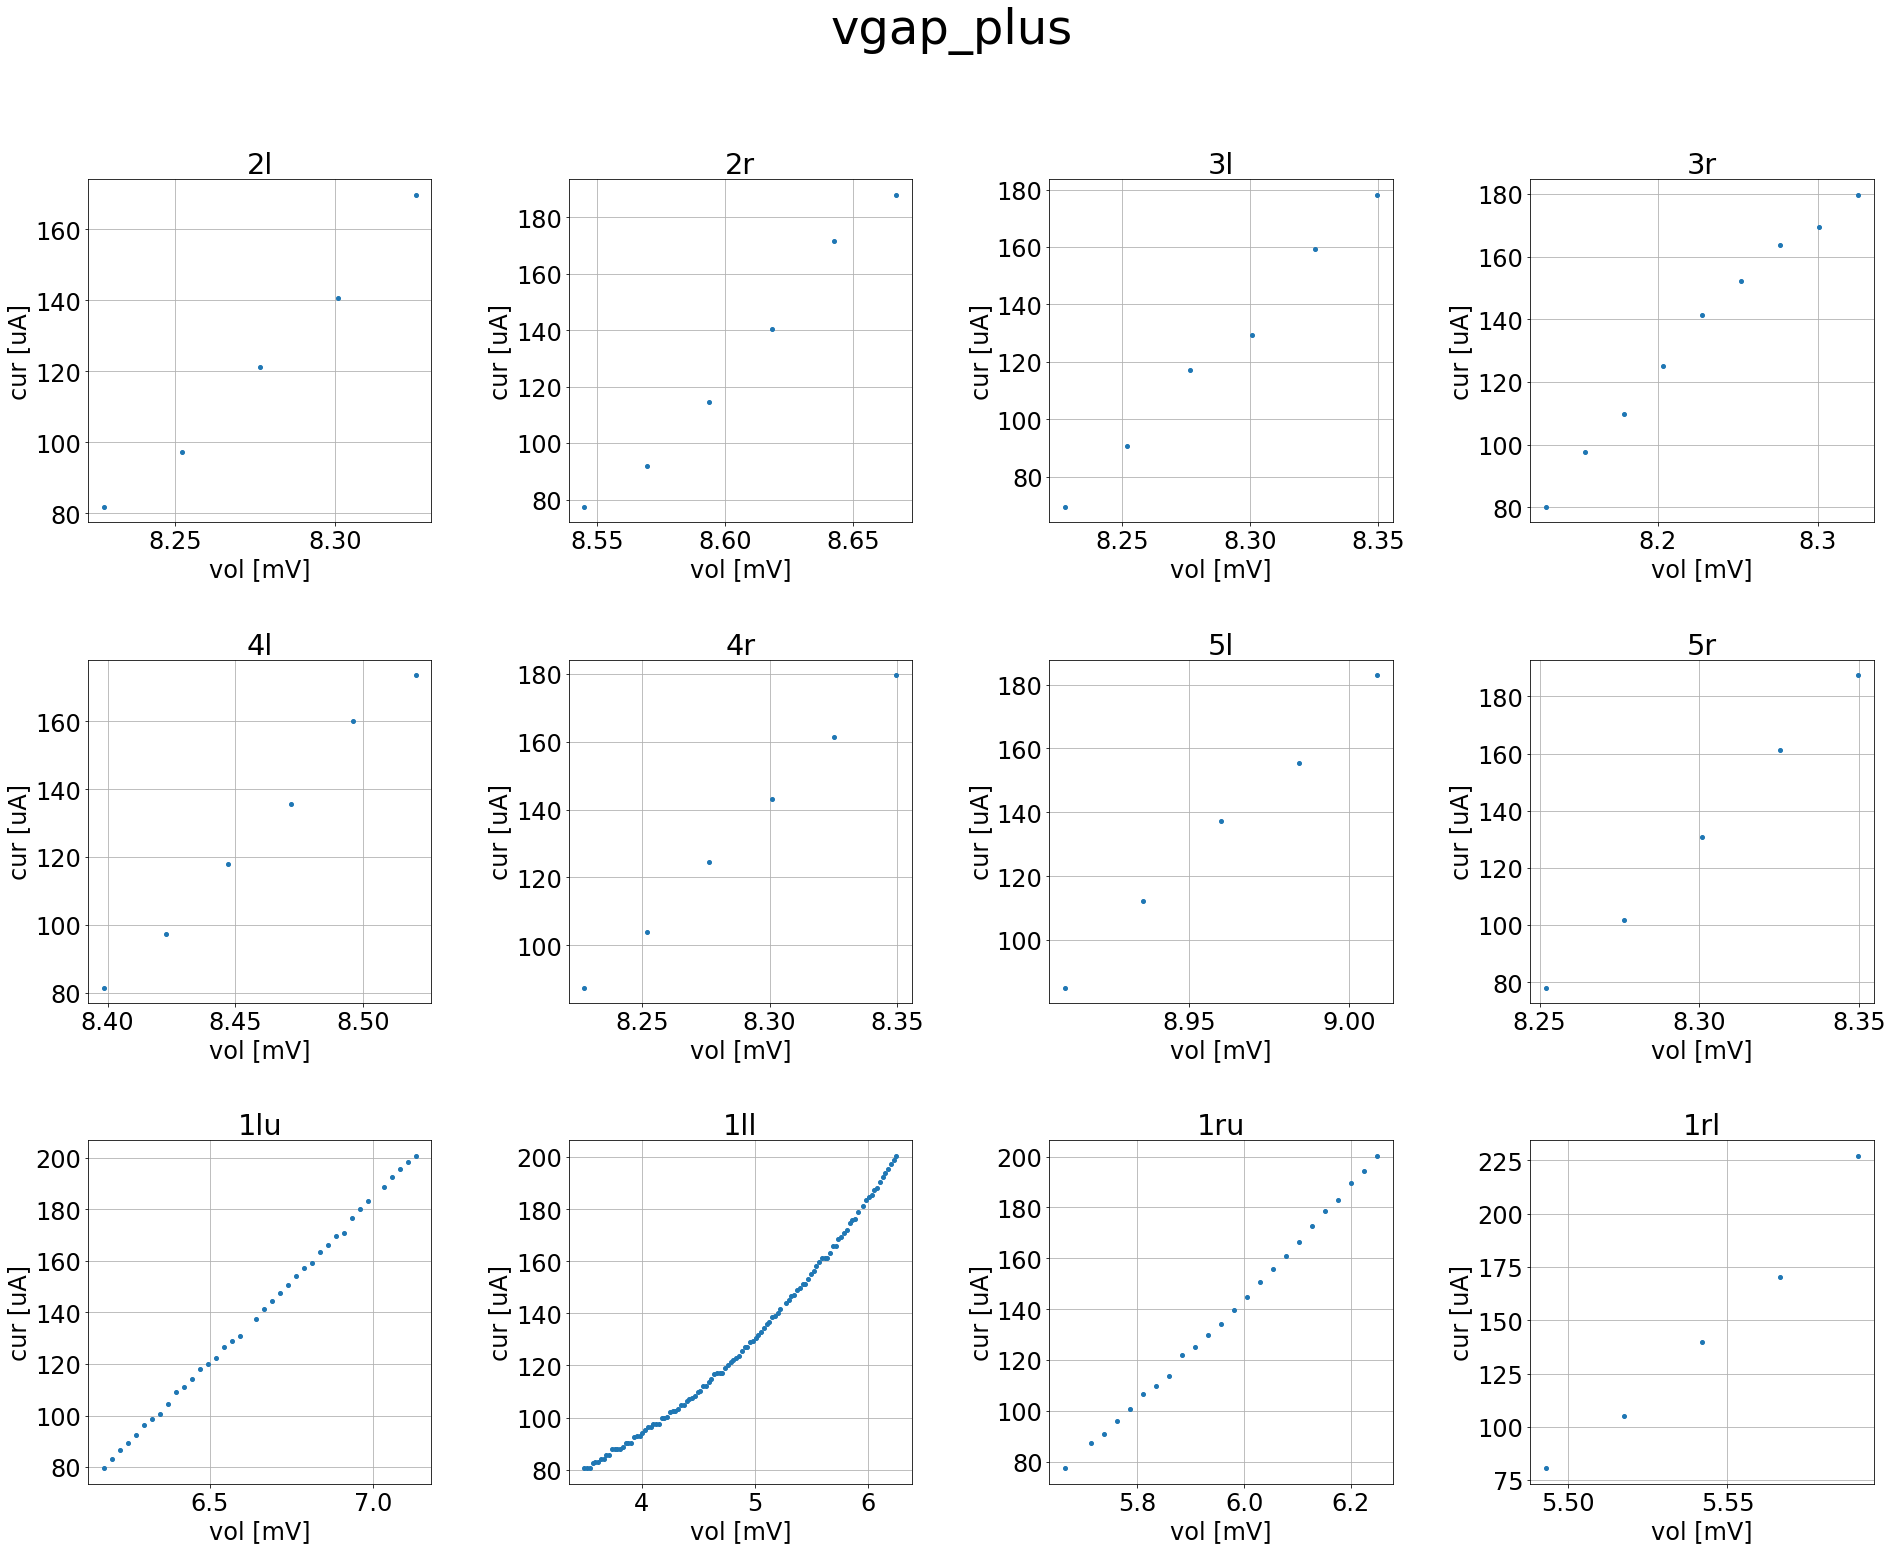

In [237]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam in zip(ax, vgap_plus_voltage, vgap_plus_current, beam_list):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
    _ax.set_xlabel('vol [mV]')
    _ax.set_ylabel('cur [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('vgap_plus', size=48)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()

In [238]:
def func(x, a, b):
    return a * x + b

In [244]:
Rn_minus_a = numpy.array([
    numpy.polyfit(Rn_minus_voltage[i], Rn_minus_current[i], 1)[0]
    for i in range(len(beam_list))
])
Rn_minus_b = numpy.array([
    numpy.polyfit(Rn_minus_voltage[i], Rn_minus_current[i], 1)[1] 
    for i in range(len(beam_list))
])
vgap_minus_a = numpy.array([
    numpy.polyfit(vgap_minus_voltage[i], vgap_minus_current[i], 1)[0]
    for i in range(len(beam_list))
])
vgap_minus_b = numpy.array([
    numpy.polyfit(vgap_minus_voltage[i], vgap_minus_current[i], 1)[1]
    for i in range(len(beam_list))
])
Rn_plus_a = numpy.array([
    numpy.polyfit(Rn_plus_voltage[i], Rn_plus_current[i], 1)[0]
    for i in range(len(beam_list))
])
Rn_plus_b = numpy.array([
    numpy.polyfit(Rn_plus_voltage[i], Rn_plus_current[i], 1)[1]
    for i in range(len(beam_list))
])
vgap_plus_a = numpy.array([
    numpy.polyfit(vgap_plus_voltage[i], vgap_plus_current[i], 1)[0] 
    for i in range(len(beam_list))
])
vgap_plus_b = numpy.array([
    numpy.polyfit(vgap_plus_voltage[i], vgap_plus_current[i], 1)[1]
    for i in range(len(beam_list))
])

In [248]:
p_minus_x = (vgap_minus_b - Rn_minus_b) / (Rn_minus_a - vgap_minus_a)
p_minus_y = (Rn_minus_a * vgap_minus_b - Rn_minus_b * vgap_minus_a) / (Rn_minus_a - vgap_minus_a)
p_minus = numpy.array([p_minus_x, p_minus_y])

p_plus_x = (vgap_plus_b - Rn_plus_b) / (Rn_plus_a - vgap_plus_a)
p_plus_y = (Rn_plus_a * vgap_plus_b - Rn_plus_b * vgap_plus_a) / (Rn_plus_a - vgap_plus_a)
p_plus = numpy.array([p_plus_x, p_plus_y])

In [249]:
p = (p_minus + p_plus) / 2

In [250]:
p

array([[-1.18001606e-01,  3.17060717e-01, -2.55252340e-01,
         3.41059457e-02, -5.68153864e-02, -1.14285137e-01,
         4.03783409e-01, -2.17910651e-01, -6.25450948e-02,
        -2.40188894e+00, -2.00468478e-01, -1.84945979e-02],
       [-1.08544217e+01, -6.97507008e+00, -1.39594501e+01,
        -8.31850102e+00, -9.91922509e+00, -6.79729446e+00,
         2.23886290e-01, -2.03968337e+01, -1.34914831e+01,
        -1.07490848e+02, -1.09398500e+01, -4.63597052e+00]])

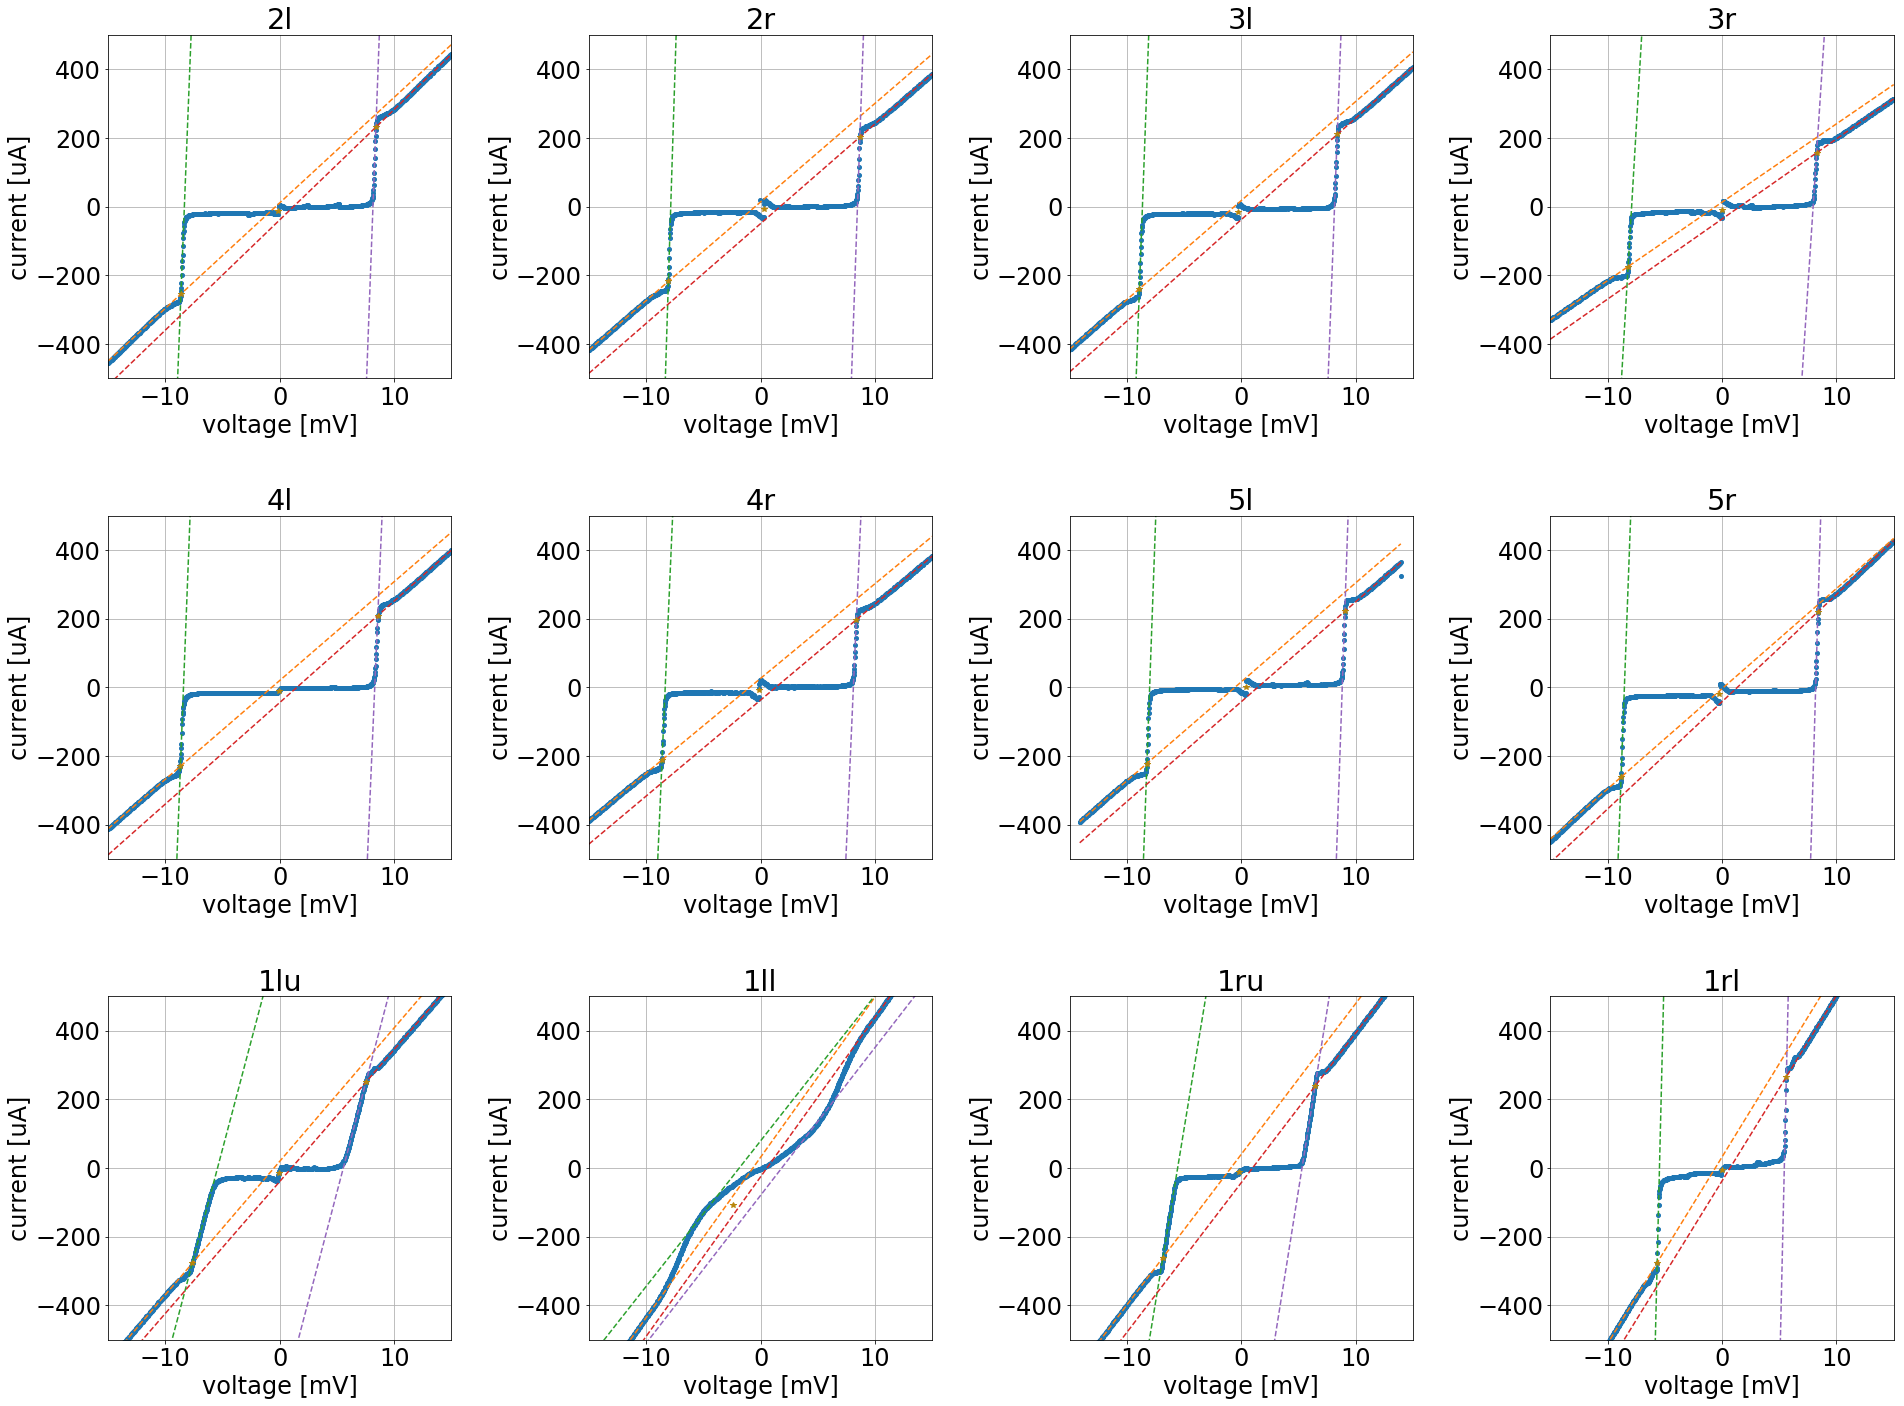

In [269]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

x = [
    numpy.linspace(min(voltage[i]), max(voltage[i]), 10000)
    for i in range(len(beam_list))
]

for _ax, _vol, _cur, beam, _x, i in zip(ax, voltage, current, beam_list, x, range(12)):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.plot(_x, func(_x, Rn_minus_a[i], Rn_minus_b[i]), '--')
    _ax.plot(_x, func(_x, vgap_minus_a[i], vgap_minus_b[i]), '--')
    _ax.plot(_x, func(_x, Rn_plus_a[i], Rn_plus_b[i]), '--')
    _ax.plot(_x, func(_x, vgap_plus_a[i], vgap_plus_b[i]), '--')    
    _ax.grid()
    _ax.set_xlim(-15, 15)
    _ax.set_ylim(-500, 500)    
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_title('{}'.format(beam))
    _ax.plot(p_minus_x[i], p_minus_y[i], c='darkgoldenrod', marker='*')
    _ax.plot(p_plus_x[i], p_plus_y[i], c='darkgoldenrod', marker='*')
    _ax.plot(p[0][i], p[1][i], c='darkgoldenrod', marker='*')

fig.subplots_adjust(wspace=0.4, hspace=0.4)

matplotlib.pyplot.show()

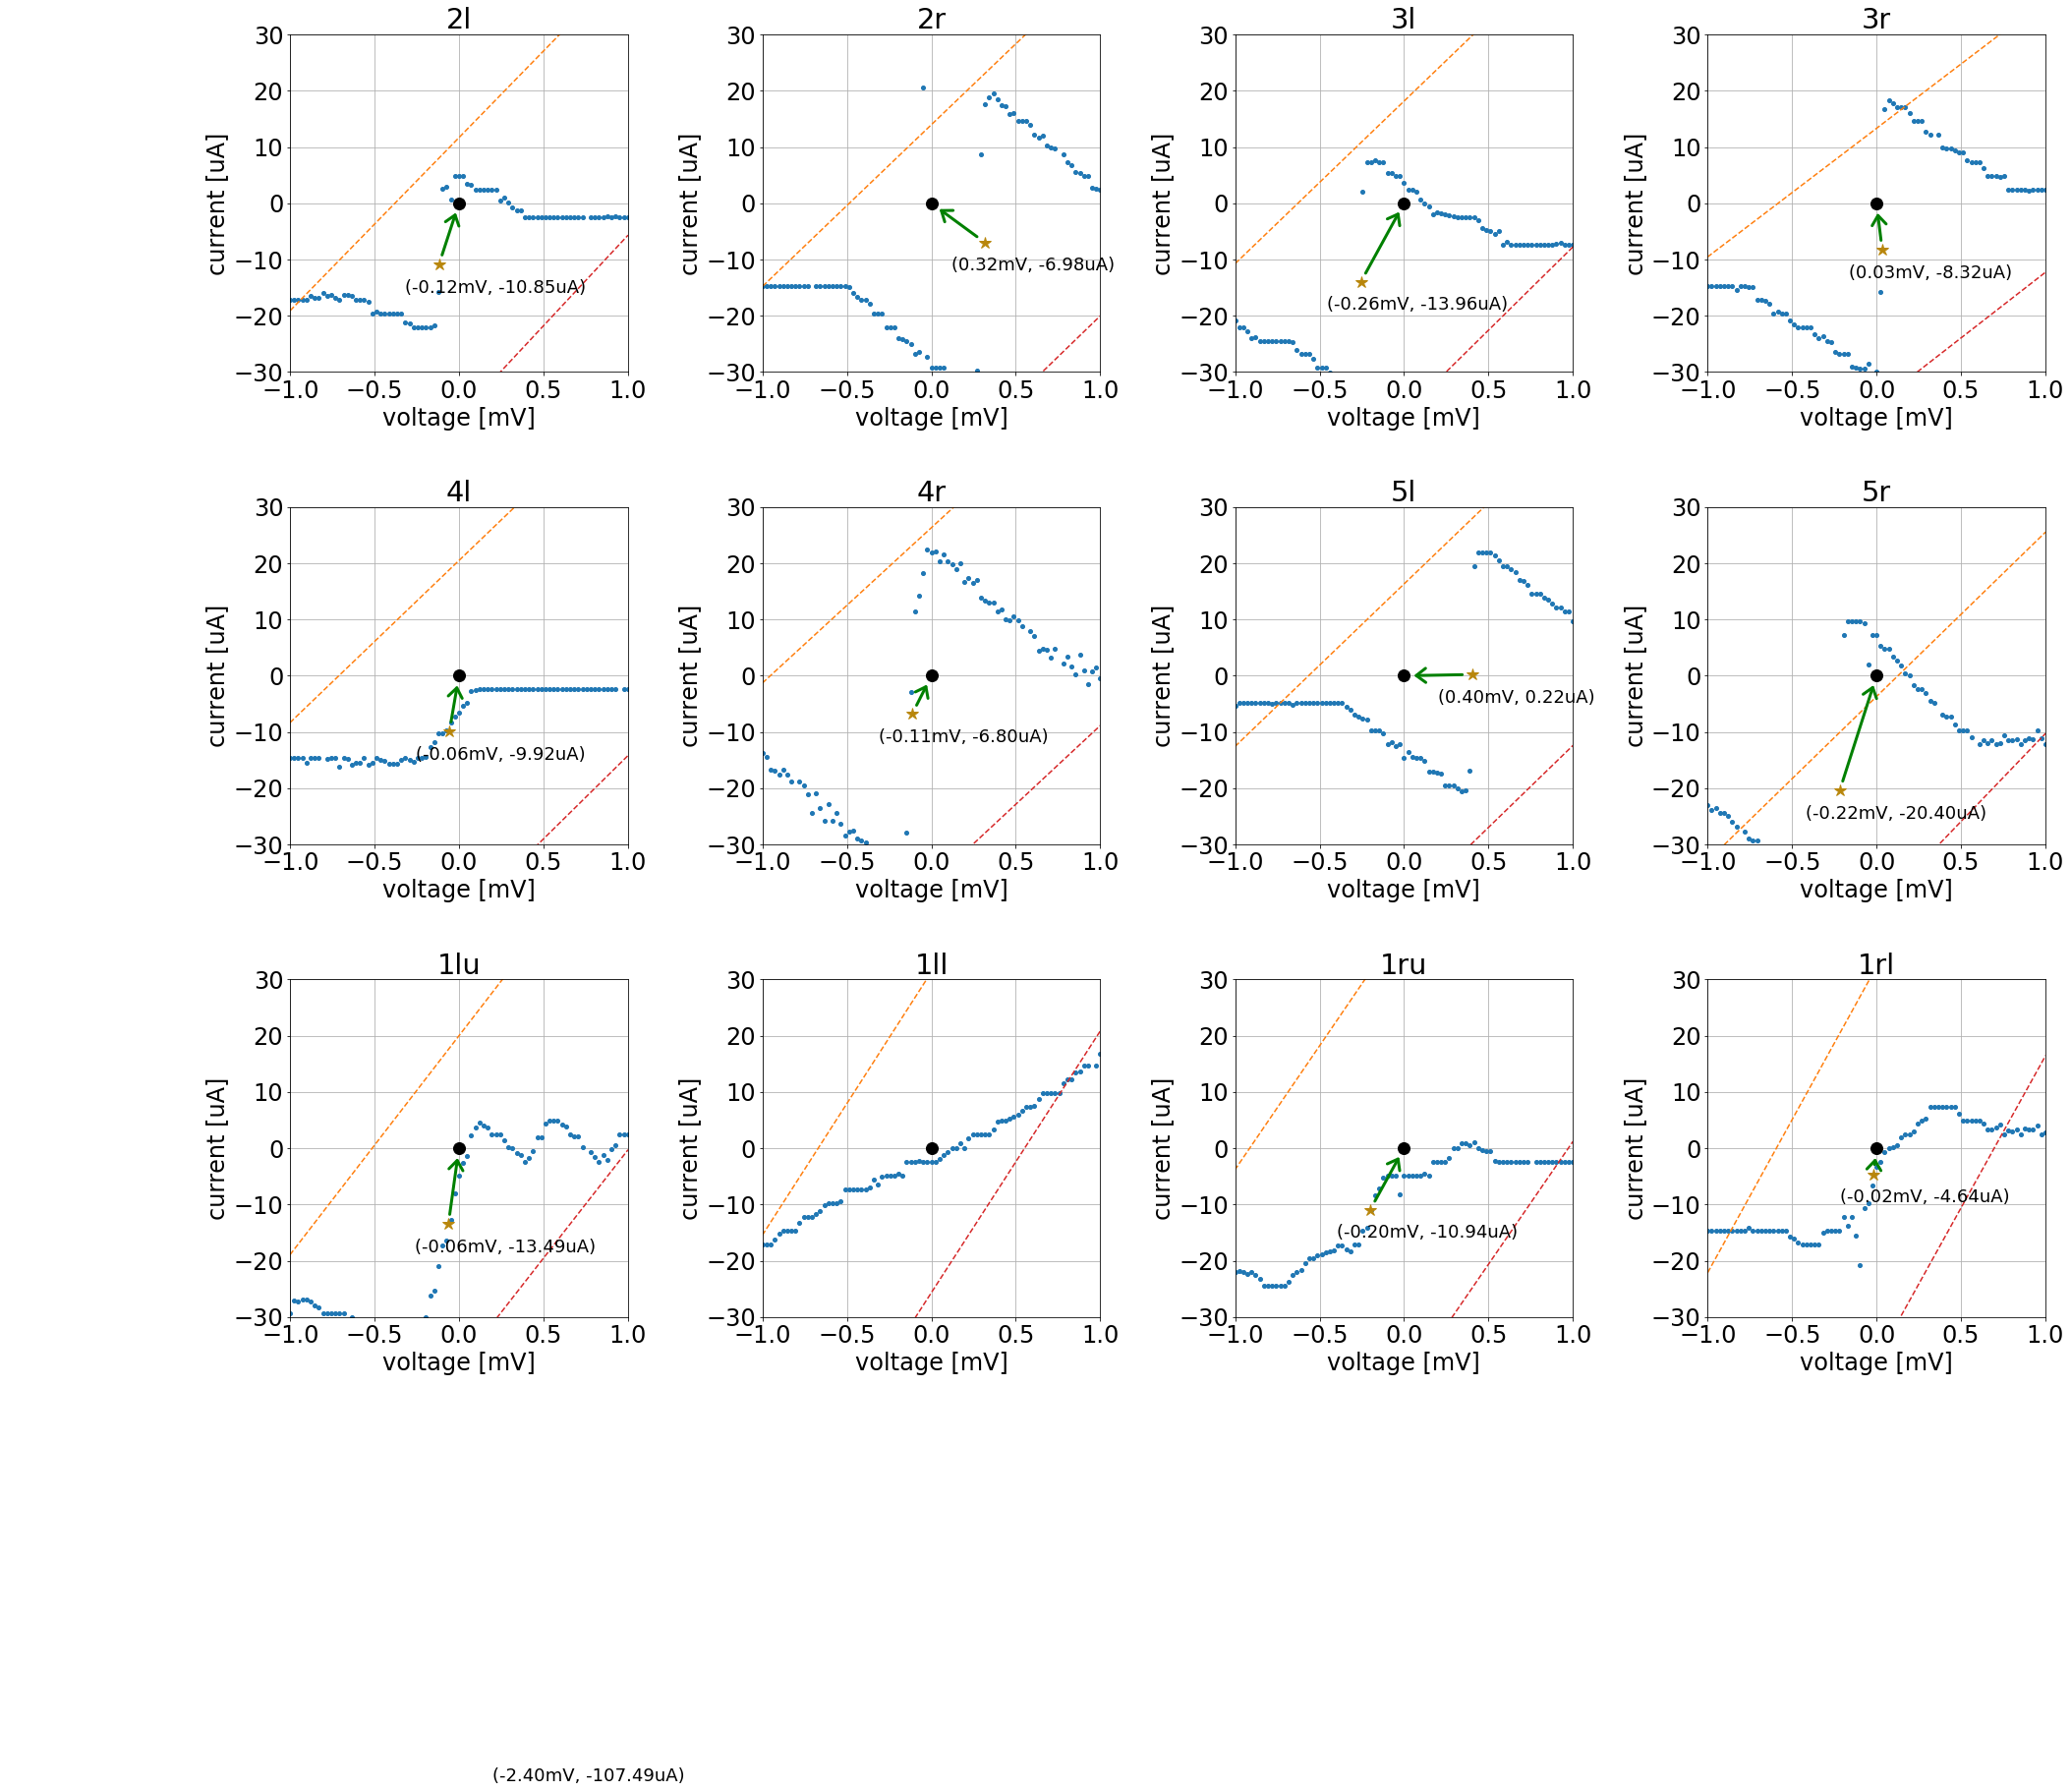

In [283]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

x = [
    numpy.linspace(min(voltage[i]), max(voltage[i]), 10000)
    for i in range(len(beam_list))
]

for _ax, _vol, _cur, beam, _x, i in zip(ax, voltage, current, beam_list, x, range(12)):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.plot(_x, func(_x, Rn_minus_a[i], Rn_minus_b[i]), '--')
    _ax.plot(_x, func(_x, vgap_minus_a[i], vgap_minus_b[i]), '--')
    _ax.plot(_x, func(_x, Rn_plus_a[i], Rn_plus_b[i]), '--')
    _ax.plot(_x, func(_x, vgap_plus_a[i], vgap_plus_b[i]), '--')    
    _ax.grid()
    _ax.set_xlim(-1, 1)
    _ax.set_ylim(-30, 30)    
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_title('{}'.format(beam))
    _ax.plot(0., 0., c='black', marker='o', markersize=12)    
    _ax.plot(p[0][i], p[1][i], c='darkgoldenrod', marker='*', markersize=12)
    _ax.annotate(s='', xy=(p[0][i], p[1][i]),xytext=(0., 0.),xycoords='data',\
                 arrowprops=dict(facecolor='green', edgecolor='green', arrowstyle='<-, head_width=0.3',lw=3,shrinkA=10,shrinkB=10))
    _ax.text(p[0][i]-0.2, p[1][i]-5., '({0:.2f}mV, {1:.2f}uA)'.format(p[0][i], p[1][i]), size=18)

fig.subplots_adjust(wspace=0.4, hspace=0.4)

matplotlib.pyplot.show()

In [286]:
# モニター側のオフセットを補正
voltage1 = [voltage[i] - p[0][i] for i in range(len(beam_list))]
current1 = [current[i] - p[1][i] for i in range(len(beam_list))]

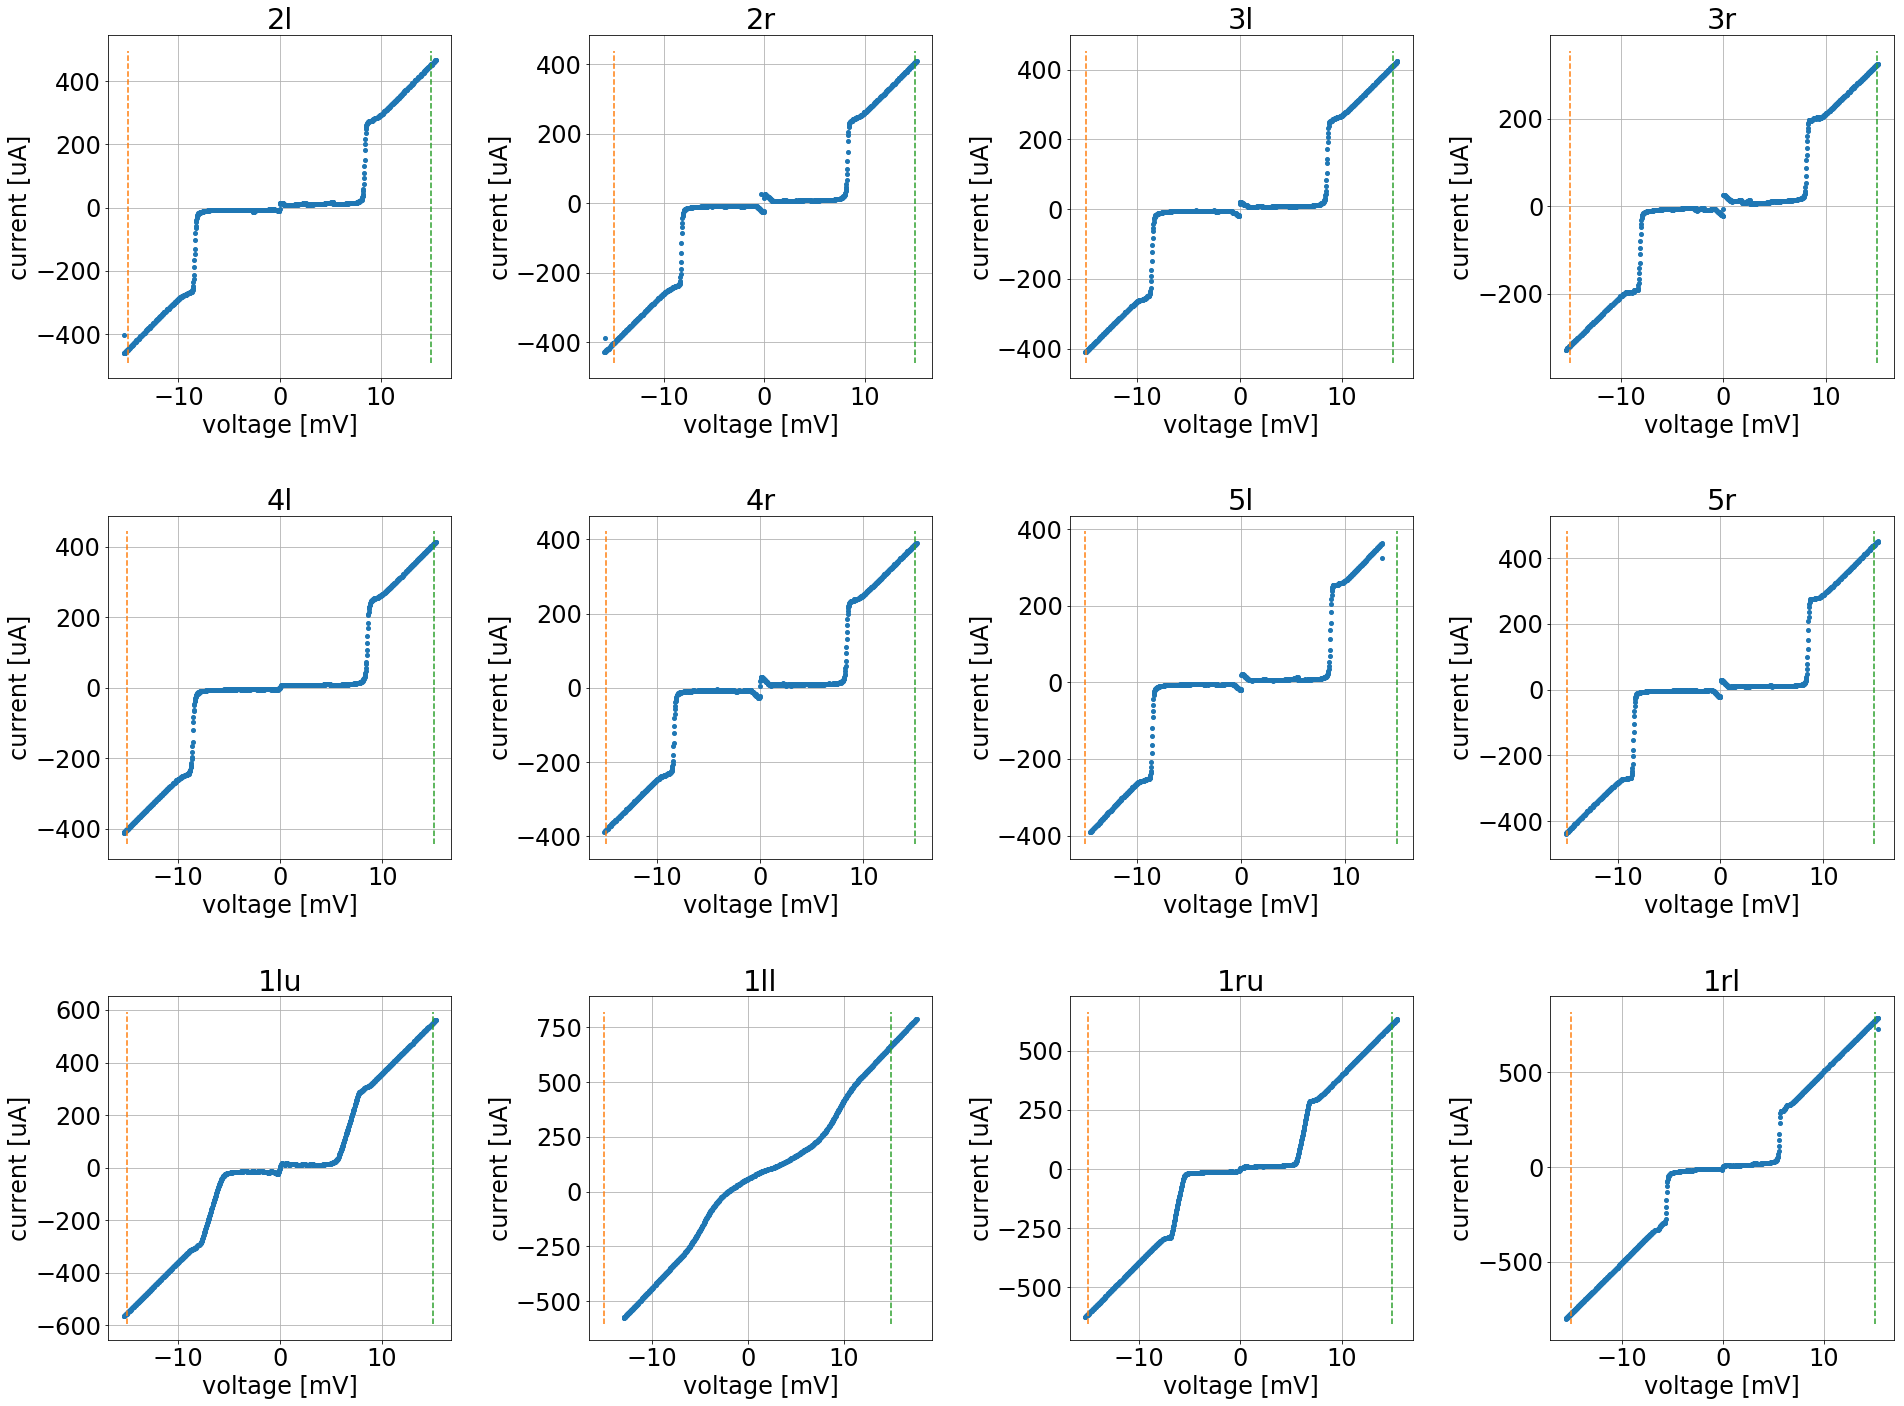

In [291]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam, _x, i in zip(ax, voltage1, current1, beam_list, x, range(12)):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
#     _ax.set_xlim(-15, 15)
#     _ax.set_ylim(-500, 500)    
    _ax.plot([-15., -15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.plot([15., 15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)

matplotlib.pyplot.show()

In [293]:
# 補正
bias_offset_plus = numpy.array([voltage1[i][-1] for i in range(len(beam_list))])
bias_offset_minus = numpy.array([voltage1[i][0] for i in range(len(beam_list))])
bias_offset = (bias_offset_plus + bias_offset_minus) / 2
print(bias_offset)

[ 0.02034536 -0.3903029   0.16980312 -0.11955516 -0.02863383  0.02883592
 -0.48923263  0.14466846 -0.02290412  2.32864675  0.11501926 -0.07916165]


In [300]:
voltage[0]

array([-16.52734375, -16.50292969, -16.47851562, ...,  14.28320312,
        14.30761719,  14.33203125])

In [296]:
voltage2 = [voltage1[i] - bias_offset[i] for i in range(len(beam_list))]
current2 = current1

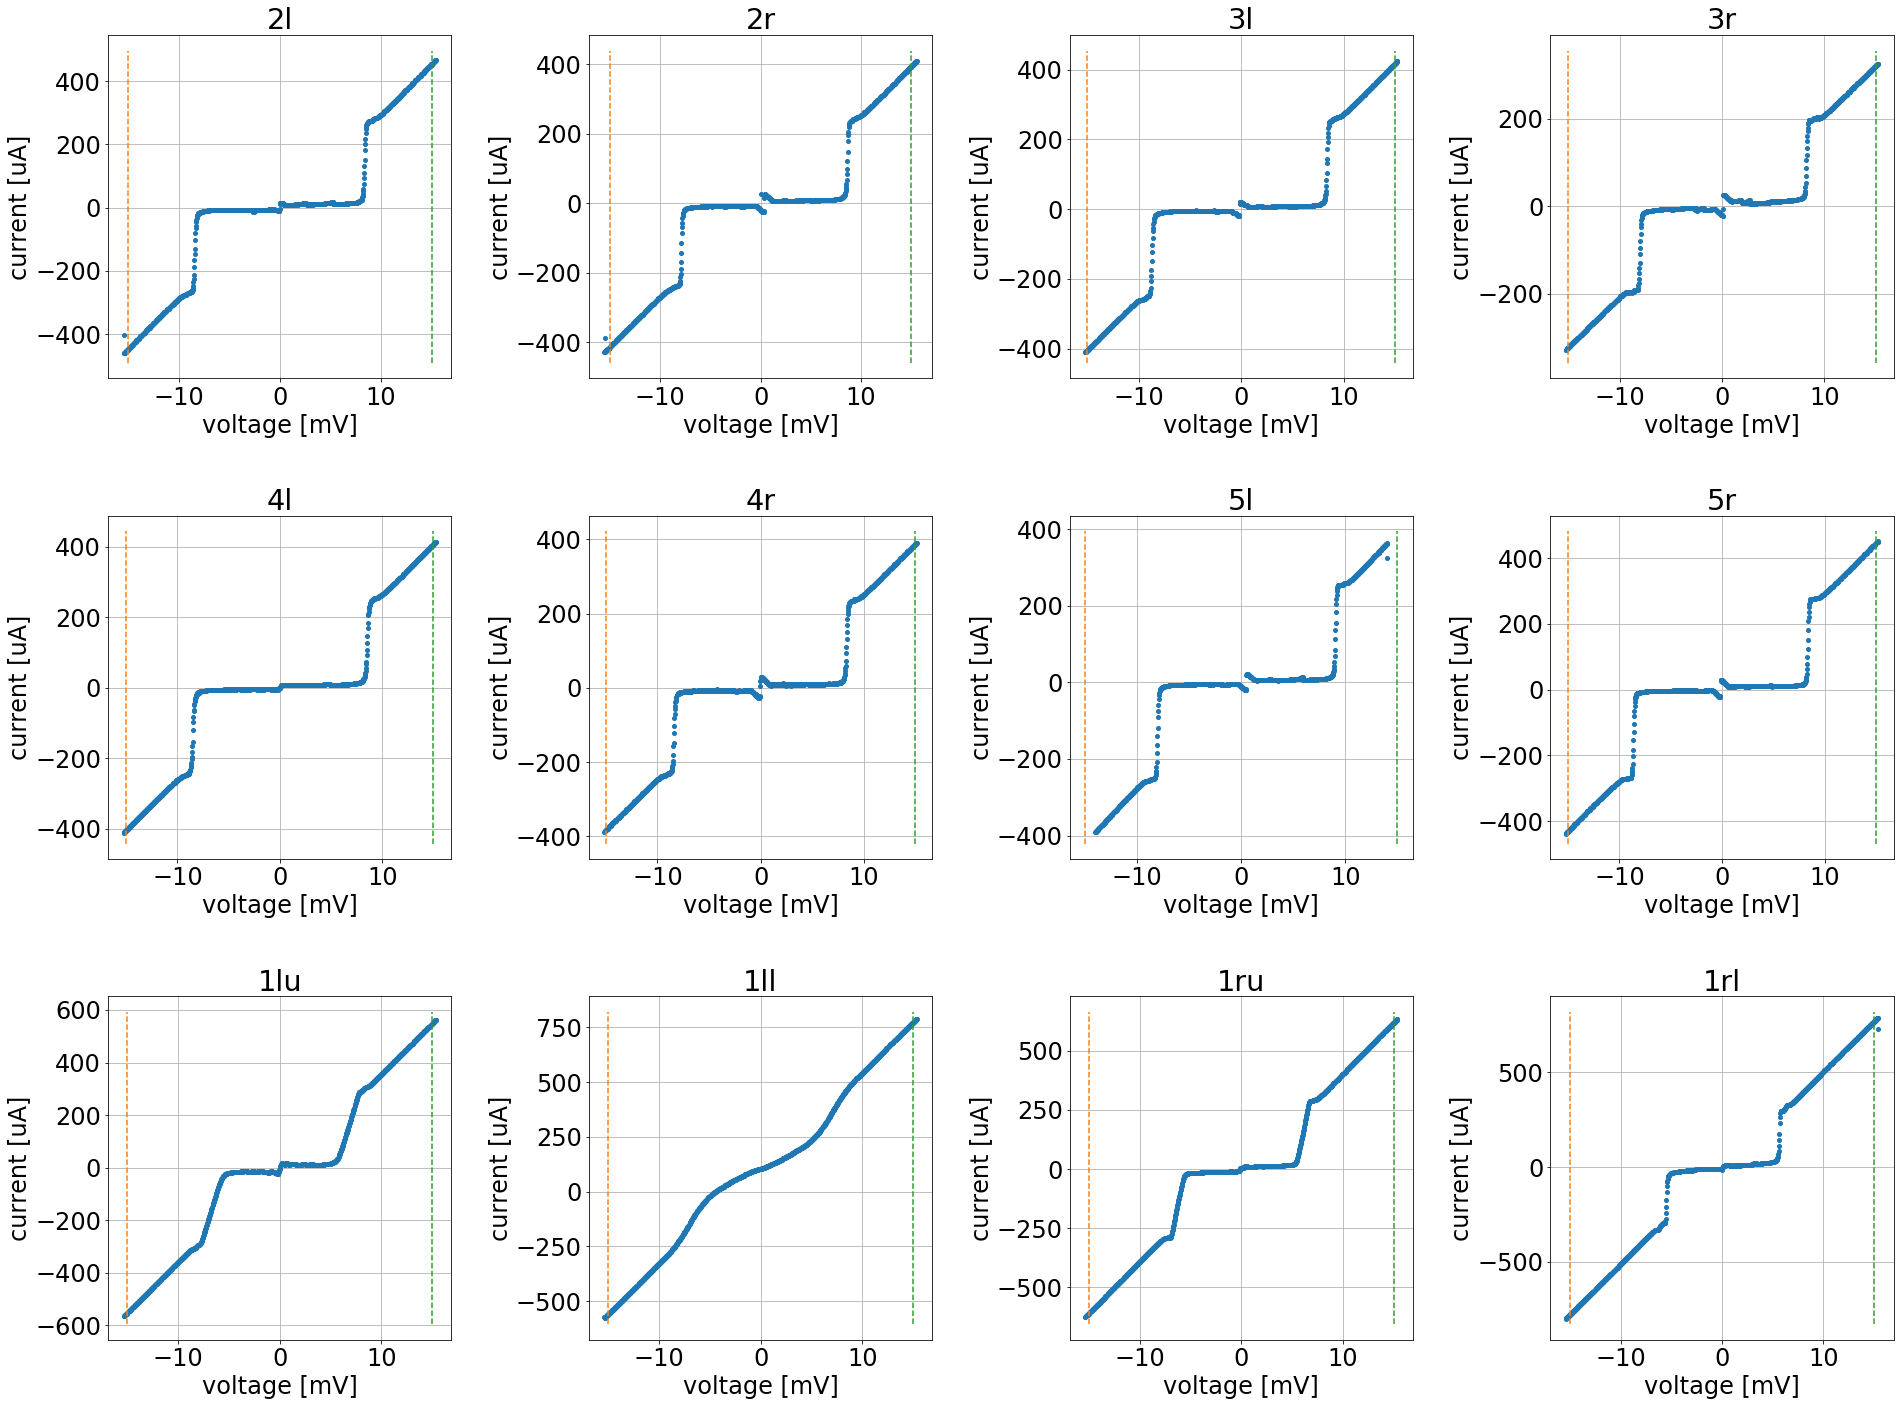

In [297]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam, _x, i in zip(ax, voltage2, current2, beam_list, x, range(12)):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
#     _ax.set_xlim(-15, 15)
#     _ax.set_ylim(-500, 500)    
    _ax.plot([-15., -15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.plot([15., 15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)

matplotlib.pyplot.show()

In [301]:
bias_scale_factor = [voltage2[i][-1] / 15 for i in range(len(beam_list))]
voltage3 = [voltage2[i] / bias_scale_factor[i] for i in range(len(beam_list))]
current3 = current2

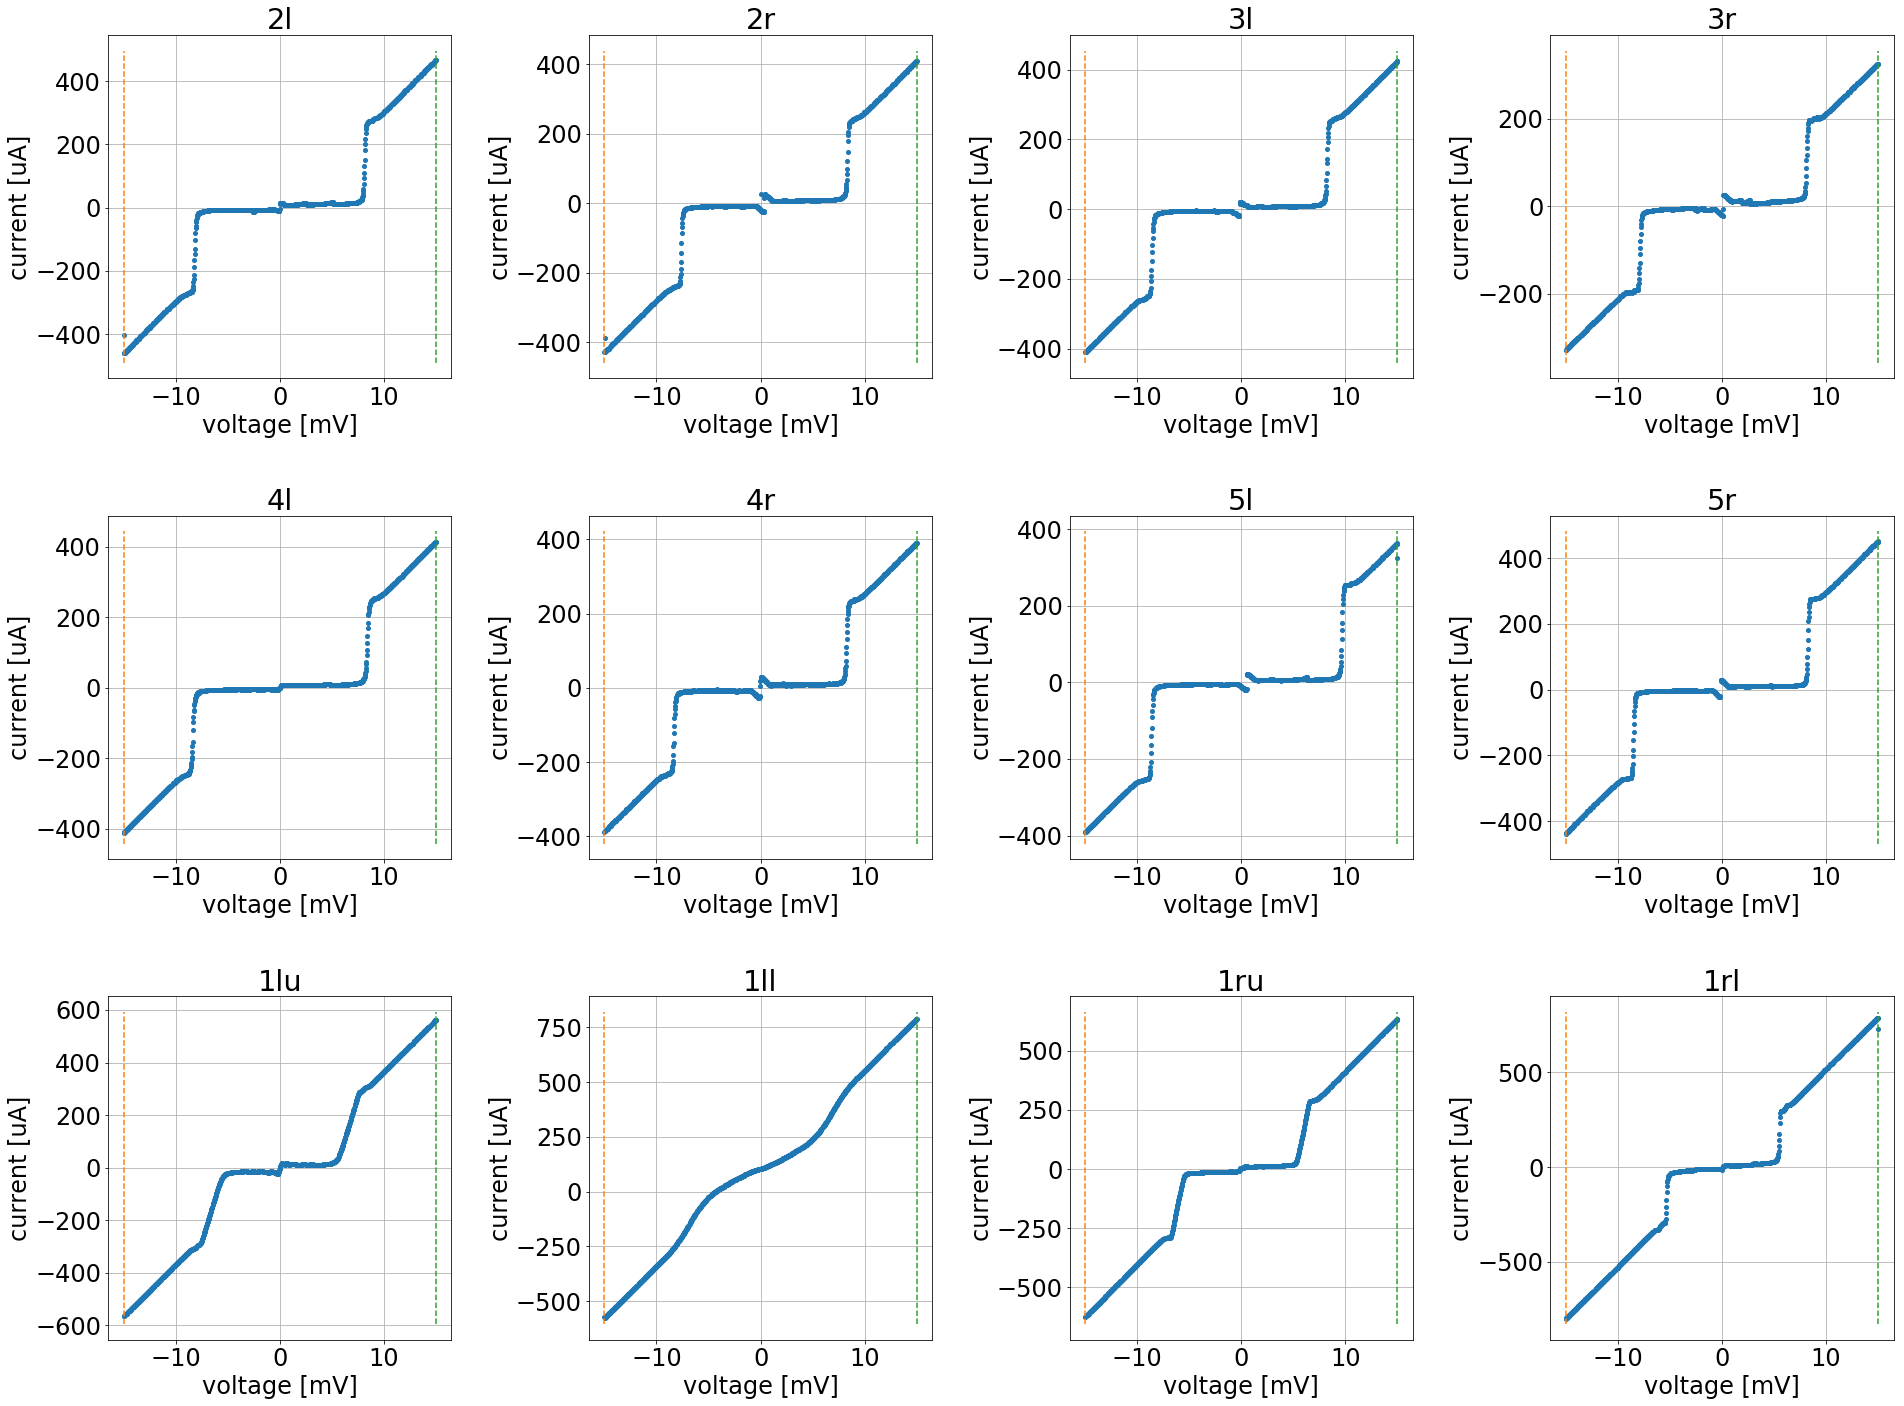

In [302]:
ncol = 4
nrow = 3
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _vol, _cur, beam, _x, i in zip(ax, voltage3, current3, beam_list, x, range(12)):
    _ax.plot(_vol, _cur, '.', markersize=8)
    _ax.grid()
#     _ax.set_xlim(-15, 15)
#     _ax.set_ylim(-500, 500)    
    _ax.plot([-15., -15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.plot([15., 15.], [min(_cur)-30, max(_cur)+30], '--')
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_title('{}'.format(beam))

fig.subplots_adjust(wspace=0.4, hspace=0.4)

matplotlib.pyplot.show()

In [307]:
for i, beam in enumerate(beam_list):
    print('----')
    print('beam : {}'.format(beam))
    print('offset = ({0:.2f} mV, {1:.2f} uA)'.format(p[0][i], p[1][i]))

----
beam : 2l
offset = (-0.12 mV, -10.85 uA)
----
beam : 2r
offset = (0.32 mV, -6.98 uA)
----
beam : 3l
offset = (-0.26 mV, -13.96 uA)
----
beam : 3r
offset = (0.03 mV, -8.32 uA)
----
beam : 4l
offset = (-0.06 mV, -9.92 uA)
----
beam : 4r
offset = (-0.11 mV, -6.80 uA)
----
beam : 5l
offset = (0.40 mV, 0.22 uA)
----
beam : 5r
offset = (-0.22 mV, -20.40 uA)
----
beam : 1lu
offset = (-0.06 mV, -13.49 uA)
----
beam : 1ll
offset = (-2.40 mV, -107.49 uA)
----
beam : 1ru
offset = (-0.20 mV, -10.94 uA)
----
beam : 1rl
offset = (-0.02 mV, -4.64 uA)


In [308]:
for i, beam in enumerate(beam_list):
    print('----')
    print('beam : {}'.format(beam))
    print('bias offset = {0:.2f} mV'.format(bias_offset[i]))

----
beam : 2l
bias offset = 0.02 mV
----
beam : 2r
bias offset = -0.39 mV
----
beam : 3l
bias offset = 0.17 mV
----
beam : 3r
bias offset = -0.12 mV
----
beam : 4l
bias offset = -0.03 mV
----
beam : 4r
bias offset = 0.03 mV
----
beam : 5l
bias offset = -0.49 mV
----
beam : 5r
bias offset = 0.14 mV
----
beam : 1lu
bias offset = -0.02 mV
----
beam : 1ll
bias offset = 2.33 mV
----
beam : 1ru
bias offset = 0.12 mV
----
beam : 1rl
bias offset = -0.08 mV


In [309]:
for i, beam in enumerate(beam_list):
    print('----')
    print('beam : {}'.format(beam))
    print('bias scale = {0:.2f}'.format(bias_scale_factor[i]))

----
beam : 2l
bias scale = 1.03
----
beam : 2r
bias scale = 1.04
----
beam : 3l
bias scale = 1.01
----
beam : 3r
bias scale = 1.02
----
beam : 4l
bias scale = 1.02
----
beam : 4r
bias scale = 1.01
----
beam : 5l
bias scale = 0.94
----
beam : 5r
bias scale = 1.01
----
beam : 1lu
bias scale = 1.02
----
beam : 1ll
bias scale = 1.02
----
beam : 1ru
bias scale = 1.02
----
beam : 1rl
bias scale = 1.03
